# Analysis of National and NY State Healthcare Providers Using Medicare Data

# Table of Contents

**Introduction**

**Part I: Medicare Spending per Beneficiary – Hospital**
1.     Dataset Description

2.     Key Variable Definitions

3.     Summary Statistics
4.     Missing Data
5.     Data Analysis
<br>&nbsp;&nbsp;&nbsp;a)     Distributions of Score
<br>&nbsp;&nbsp;&nbsp;b)     Distribution of Score by Geography
<br>&nbsp;&nbsp;&nbsp;c)     Deep Dive into New Yorker Providers
<br>&nbsp;&nbsp;&nbsp;d)      Relationship of Score with Volume of Discharges per State
 
**Part II: Hospital Readmissions Reduction Program**
1.     Dataset Description
2.     Key Variable Definitions
3.     Summary Statistics
4.     Missing Data
5.     Data Analysis
<br>&nbsp;&nbsp;&nbsp;a)     ERR Ratio
<br>&nbsp;&nbsp;&nbsp;b)    NY State Analysis
<br>&nbsp;&nbsp;&nbsp;c)     Conditions Analysis
 
**Part III: Inpatient Prospective Payment System (IPPS) Provider Summary for All Diagnosis-Related Groups (DRG) - FY2016**
1.     Dataset description
2.     Key Variable Definitions
3.     Summary Statistics
4.     Missing Data
5.     Data Analysis
<br>&nbsp;&nbsp;&nbsp;a) Average payment amounts by DRG
<br>&nbsp;&nbsp;&nbsp;b) Deep dive into heart transplants
<br>&nbsp;&nbsp;&nbsp;c) Reimbursement rates across states
<br>&nbsp;&nbsp;&nbsp;d) Association between common procedures and higher reimbursement
<br>&nbsp;&nbsp;&nbsp;e) State income and heart transplant coverage
<br>&nbsp;&nbsp;&nbsp;f) Average Medicare payments and state Medicare population
<br>&nbsp;&nbsp;&nbsp;g) Regression data


**Conclusion**

# Introduction

Nationwide 44 million Americans are on Medicare which is 15% of the population. Currently, Medicare accounts of 2.9% of GDP. However, over the next 30 years that number is expected to grow to 5.9%.  Since most Medicare laws vary at the state level, we decided to take a more micro approach in our analysis to explore and analyze these rising healthcare costs. 

In this project we evaluate Medicare at the both the provider and state level data on patient outcomes and procedure prices.  Our goal is to both illustrate the nuances across a select number of states and help guide our readers on their own health care decisions in an attempt to address the significant challenges in the healthcare industry today. 

# PART I
## Medicare Spending per Beneficiary - Hospital
### *Data Source: HealthData.gov*
#### https://healthdata.gov/dataset/medicare-spending-beneficiary-%E2%80%93-hospital

In [2]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt   
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
%matplotlib inline

# 1. Dataset Description

This dataset includes identifying information about each provider, along with their Score (which relates to the amount of Medicare costs. See below for full definition of Score). **The Score is the main datapoint of interest in this dataset.** Medicare can use this information to determine which providers cost them more money, on a national scale, compared with the national median. **Medicare calculates this score, along with other measures focused on improvement and achievement, to analyze provider performance and present this data to the public.** This MSPB Score is of great significance today, as we as a country are grappling with rising healthcare costs. 

### Scores >1 are associated with Providers that have higher costs per patient compared to the national median, and Scores <1 are associated with Providers that have lower costs per patient compared to the national median.


## Objective:
**While cost is only one component of clinical care, it must be examined to develop a comprehensive analysis of healthcare today.** Medicare has developed innovative ways to decrease costs, and **identifying the MSPB Score is one tool they have developed to understand costs at a national level.** Our objective is to explore the potential for Medicare to use this data to identify hospitals or certain geographic areas that have lower costs than the national median and to analyze New York City providers in particular. If these analyses are possible, then Medicare can study certain providers' cost-control practices. Medicare can then work to spread these best practices to other providers in an attempt to curb the rising healthcare costs in this country.

In [6]:
mspb = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/Medicare_Spending_Per_Beneficiary___Hospital.csv",
                   na_values=["Not Available"])
mspb

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date,Location
0,171312,COMANCHE COUNTY HOSPITAL,2ND & FRISCO STREET,COLDWATER,KS,67029,COMANCHE,(620) 582-2144,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"2ND &amp; FRISCO STREET COLDWATER, KS 67029"
1,281326,ANTELOPE MEMORIAL HOSPITAL,"P O BOX 229, 102 WEST 9TH ST",NELIGH,NE,68756,ANTELOPE,(402) 887-4151,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"P O BOX 229, 102 WEST 9TH ST NELIGH, NE 68756"
2,400021,HOSPITAL DE LA CONCEPCION,ROAD NUMBER 2 KM 173.4 CAIN ALTO,SAN GERMAN,PR,683,SAN GERMAN,(787) 892-1860,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"ROAD NUMBER 2 KM 173.4 CAIN ALTO SAN GERMAN, P..."
3,431309,COMMUNITY MEMORIAL HOSPITAL,809 JACKSON POST OFFICE BOX 319,BURKE,SD,57523,GREGORY,(605) 775-2621,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"809 JACKSON POST OFFICE BOX 319 BURKE, SD 57523"
4,330049,NORTHERN DUTCHESS HOSPITAL,6511 SPRINGBROOK AVENUE,RHINEBECK,NY,12572,DUTCHESS,(845) 871-3391,Medicare hospital spending per patient (Medica...,MSPB-1,0.97,NaN,1/1/17,12/31/17,"6511 SPRINGBROOK AVENUE RHINEBECK, NY 12572"
5,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,PR,693,VEGA BAJA,(787) 858-1580,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO VEG...
6,281344,CHERRY COUNTY HOSPITAL,"P O BOX 410, 510 NORTH GREEN ST",VALENTINE,NE,69201,CHERRY,(402) 376-2525,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"P O BOX 410, 510 NORTH GREEN ST VALENTINE, NE ..."
7,471300,GRACE COTTAGE HOSPITAL,PO BOX 216,TOWNSHEND,VT,5353,WINDHAM,(802) 365-7920,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"PO BOX 216 TOWNSHEND, VT 05353"
8,330055,NEW YORK-PRESBYTERIAN/QUEENS,56-45 MAIN STREET,FLUSHING,NY,11355,QUEENS,(718) 670-2000,Medicare hospital spending per patient (Medica...,MSPB-1,1.02,NaN,1/1/17,12/31/17,"56-45 MAIN STREET FLUSHING, NY 11355"
9,330085,AURELIA OSBORN FOX MEMORIAL HOSPITAL,ONE NORTON AVENUE,ONEONTA,NY,13820,OTSEGO,(607) 432-2000,Medicare hospital spending per patient (Medica...,MSPB-1,0.92,NaN,1/1/17,12/31/17,"ONE NORTON AVENUE ONEONTA, NY 13820"


# 2. Key Variable Definitions

**Provider ID:** This is the ID number that Medicare uses to identify each provider, which includes hospitals and other health centers.

**Measure Name:** This is what Medicare is measuring in the dataset. In this dataset, Medicare is specifically examining the Medicare hospital spending per patient for each of the providers.

**MSPB-1**: This is the Measure ID for each of the datapoints for the providers in this dataset. This ID looks specifically at hospital and provider reimbursement from Medicare for each of their patients that were admitted to the hospital, including specifically payments made for services performed 3 days prior to and 30 days after the patient's hospital admission.

**Score:** The score is used to compare the individual provider's costs with those of a hospital at the median level of costs. This score is adjusted for each hospital based on their specific patient demographics, medical diagnoses, and geography.

# 3. Summary Statistics

In [43]:
mspb['Provider ID'].nunique()

4784

In [44]:
len(mspb.index)

4784

There are 4,784 rows and 4,784 Provider IDs. **Each row is a unique provider.**

In [3]:
mspb['State'].value_counts()

TX    405
CA    339
FL    184
IL    180
PA    172
NY    170
OH    168
KS    136
GA    132
MI    131
MN    130
WI    126
OK    124
IN    120
LA    118
IA    116
MO    112
TN    106
NC    105
MS     95
KY     91
WA     91
AL     91
NE     89
VA     84
CO     82
AZ     77
AR     76
NJ     66
MT     62
MA     62
OR     60
SC     60
SD     58
PR     52
WV     49
MD     49
UT     46
ND     44
ID     42
NM     41
NV     35
ME     33
CT     31
WY     28
NH     26
HI     23
AK     22
VT     14
RI     10
DC      8
DE      7
VI      2
GU      2
AS      1
MP      1
Name: State, dtype: int64

Above we see a list of the number of providers per state, and below is this data in visualized form.

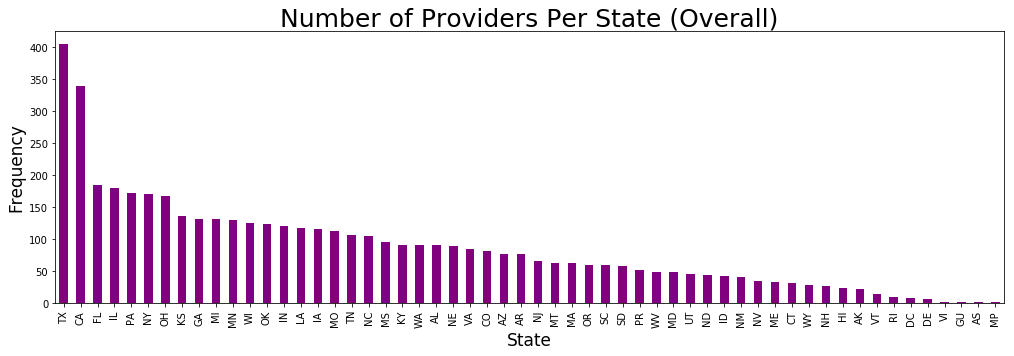

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.set_ylabel('Frequency',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Number of Providers Per State (Overall)', fontsize=25)
mspb['State'].value_counts().plot.bar(figsize=(17,5),color='purple')

This graph, and the value counts above, show that **states like Texas and California are over-represented in this data, compared with states like Rhode Island and Vermont. New York is on the higher end of number of providers**, so we will use the data in this dataset to continue to focus on New York. Below is a missing data analysis to see how the missing data may affect our analyses.

# 4. Missing Data

In [5]:
mspb.isna().sum() 

Provider ID              0
Hospital Name            0
Address                  0
City                     0
State                    0
ZIP Code                 0
County Name             11
Phone Number             0
Measure Name             0
Measure ID               0
Score                 1662
Footnote              3121
Measure Start Date       0
Measure End Date         0
Location                 0
dtype: int64

We see that there are 1,662 Providers that have a null Score.

In [8]:
mspb['Score'].isna().sum() / len(mspb.index)

0.34740802675585286

This calculation shows that ~34.7% of Provider IDs in this database do not have a Score associated with them. This means that **of the data we're interested in (Score), about a third is missing.** Below we continue with analyses to understand better this missing data.

In [9]:
mspb_providers_w_na_score = mspb
mspb_providers_w_na_score = mspb_providers_w_na_score.loc[(mspb_providers_w_na_score['Score'].isna())]
mspb_providers_w_na_score

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date,Location
0,171312,COMANCHE COUNTY HOSPITAL,2ND & FRISCO STREET,COLDWATER,KS,67029,COMANCHE,(620) 582-2144,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"2ND &amp; FRISCO STREET COLDWATER, KS 67029"
1,281326,ANTELOPE MEMORIAL HOSPITAL,"P O BOX 229, 102 WEST 9TH ST",NELIGH,NE,68756,ANTELOPE,(402) 887-4151,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"P O BOX 229, 102 WEST 9TH ST NELIGH, NE 68756"
2,400021,HOSPITAL DE LA CONCEPCION,ROAD NUMBER 2 KM 173.4 CAIN ALTO,SAN GERMAN,PR,683,SAN GERMAN,(787) 892-1860,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"ROAD NUMBER 2 KM 173.4 CAIN ALTO SAN GERMAN, P..."
3,431309,COMMUNITY MEMORIAL HOSPITAL,809 JACKSON POST OFFICE BOX 319,BURKE,SD,57523,GREGORY,(605) 775-2621,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"809 JACKSON POST OFFICE BOX 319 BURKE, SD 57523"
5,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,PR,693,VEGA BAJA,(787) 858-1580,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO VEG...
6,281344,CHERRY COUNTY HOSPITAL,"P O BOX 410, 510 NORTH GREEN ST",VALENTINE,NE,69201,CHERRY,(402) 376-2525,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"P O BOX 410, 510 NORTH GREEN ST VALENTINE, NE ..."
7,471300,GRACE COTTAGE HOSPITAL,PO BOX 216,TOWNSHEND,VT,5353,WINDHAM,(802) 365-7920,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"PO BOX 216 TOWNSHEND, VT 05353"
10,51317,ADVENTIST HEALTH CLEARLAKE,15630 18TH AVE - HWY 53,CLEARLAKE,CA,95422,LAKE,(707) 994-6486,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"15630 18TH AVE - HWY 53 CLEARLAKE, CA 95422"
11,451361,SABINE COUNTY HOSPITAL,"PO BOX 750, 2301 HWY 83 W",HEMPHILL,TX,75948,SABINE,(409) 787-3300,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"PO BOX 750, 2301 HWY 83 W HEMPHILL, TX 75948"
13,171304,ASHLAND HEALTH CENTER,625 SOUTH KENTUCKY,ASHLAND,KS,67831,CLARK,(620) 635-2241,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"625 SOUTH KENTUCKY ASHLAND, KS 67831"


Above is a dataframe that includes only the providers that have a null Score. Below is a dataframe that includes only the providers that have a non-null Score.

In [10]:
mspb_providers_w_score = mspb
mspb_providers_w_score = mspb_providers_w_score.loc[(mspb_providers_w_score['Score']>=0)]
mspb_providers_w_score

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date,Location
4,330049,NORTHERN DUTCHESS HOSPITAL,6511 SPRINGBROOK AVENUE,RHINEBECK,NY,12572,DUTCHESS,(845) 871-3391,Medicare hospital spending per patient (Medica...,MSPB-1,0.97,NaN,1/1/17,12/31/17,"6511 SPRINGBROOK AVENUE RHINEBECK, NY 12572"
8,330055,NEW YORK-PRESBYTERIAN/QUEENS,56-45 MAIN STREET,FLUSHING,NY,11355,QUEENS,(718) 670-2000,Medicare hospital spending per patient (Medica...,MSPB-1,1.02,NaN,1/1/17,12/31/17,"56-45 MAIN STREET FLUSHING, NY 11355"
9,330085,AURELIA OSBORN FOX MEMORIAL HOSPITAL,ONE NORTON AVENUE,ONEONTA,NY,13820,OTSEGO,(607) 432-2000,Medicare hospital spending per patient (Medica...,MSPB-1,0.92,NaN,1/1/17,12/31/17,"ONE NORTON AVENUE ONEONTA, NY 13820"
12,420106,PALMETTO HEALTH BAPTIST PARKRIDGE,400 PALMETTO HEALTH PARKWAY,COLUMBIA,SC,29212,LEXINGTON,(803) 907-7011,Medicare hospital spending per patient (Medica...,MSPB-1,0.94,NaN,1/1/17,12/31/17,"400 PALMETTO HEALTH PARKWAY COLUMBIA, SC 29212"
15,140118,METROSOUTH MEDICAL CENTER,12935 S GREGORY,BLUE ISLAND,IL,60406,COOK,(708) 597-2000,Medicare hospital spending per patient (Medica...,MSPB-1,1.04,NaN,1/1/17,12/31/17,"12935 S GREGORY BLUE ISLAND, IL 60406"
16,340144,DAVIS REGIONAL MEDICAL CENTER,218 OLD MOCKSBVILLE RD PO BOX 1823,STATESVILLE,NC,28687,IREDELL,(704) 873-0281,Medicare hospital spending per patient (Medica...,MSPB-1,0.92,NaN,1/1/17,12/31/17,218 OLD MOCKSBVILLE RD PO BOX 1823 STATESVILLE...
17,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Medicare hospital spending per patient (Medica...,MSPB-1,1.01,NaN,1/1/17,12/31/17,"2505 U S HIGHWAY 431 NORTH BOAZ, AL 35957"
18,390146,WARREN GENERAL HOSPITAL,TWO CRESCENT PARK WEST,WARREN,PA,16365,WARREN,(814) 723-3300,Medicare hospital spending per patient (Medica...,MSPB-1,0.92,NaN,1/1/17,12/31/17,"TWO CRESCENT PARK WEST WARREN, PA 16365"
21,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,Medicare hospital spending per patient (Medica...,MSPB-1,0.67,NaN,1/1/17,12/31/17,"ROUTE 301 NORTH B STREET ZUNI, NM 87327"
23,310011,CAPE REGIONAL MEDICAL CENTER INC,TWO STONE HARBOR BLVD,CAPE MAY COURT HOUSE,NJ,8210,CAPE MAY,(609) 463-2000,Medicare hospital spending per patient (Medica...,MSPB-1,1.00,NaN,1/1/17,12/31/17,"TWO STONE HARBOR BLVD CAPE MAY COURT HOUSE, NJ..."


Below is a count of the number of providers with null Score per state.

In [12]:
mspb_providers_w_na_score_state = mspb_providers_w_na_score.groupby('State')
mspb_providers_w_na_score_state['Provider ID'].count()

State
AK     14
AL      8
AR     32
AS      1
AZ     17
CA     53
CO     37
CT      3
DC      1
DE      1
FL     18
GA     33
GU      2
HI     11
IA     82
ID     29
IL     56
IN     35
KS     85
KY     28
LA     35
MA      7
MD     49
ME     16
MI     38
MN     83
MO     40
MP      1
MS     38
MT     49
NC     22
ND     37
NE     66
NH     13
NJ      2
NM     13
NV     15
NY     27
OH     43
OK     45
OR     26
PA     25
PR     52
SC      7
SD     42
TN     20
TX    124
UT     16
VA     12
VI      2
VT      8
WA     44
WI     61
WV     20
WY     18
Name: Provider ID, dtype: int64

Below we created a new dataframe to show the State, the number of null Scores per state, and the percent of Providers that have null Scores per State.

In [47]:
mspb_count_na = pd.DataFrame(columns=['num_null','num_total','Perc_null_Score'])
mspb_count_na['num_null']=mspb_providers_w_na_score_state['Provider ID'].count().sort_index()
mspb_count_na['num_total']=mspb.groupby('State').count().sort_index()
mspb_count_na['Perc_null_Score']=mspb_count_na['num_null']/mspb_count_na['num_total']
mspb_count_na['State'] = mspb_count_na.index
mspb_count_na

,num_null,num_total,Perc_null_Score,State
State,,,,
AK,14,22,0.636364,AK
AL,8,91,0.087912,AL
AR,32,76,0.421053,AR
AS,1,1,1.000000,AS
AZ,17,77,0.220779,AZ
CA,53,339,0.156342,CA
CO,37,82,0.451220,CO
CT,3,31,0.096774,CT
DC,1,8,0.125000,DC


In [14]:
mspb_count_na.loc[mspb_count_na['State']=='NY','num_null']

State
NY    27
Name: num_null, dtype: int64

We see above that there are 27 providers in NY State with a null Score, which represents 15.9% of providers in the state (as shown below). This does not seem like a high number, but **next we want to compare these numbers with the data from other states to see if NY state providers are well-represented with non-null Scores compared with other states.**

In [15]:
mspb_count_na.loc[mspb_count_na['State']=='NY','Perc_null_Score']

State
NY    0.158824
Name: Perc_null_Score, dtype: float64

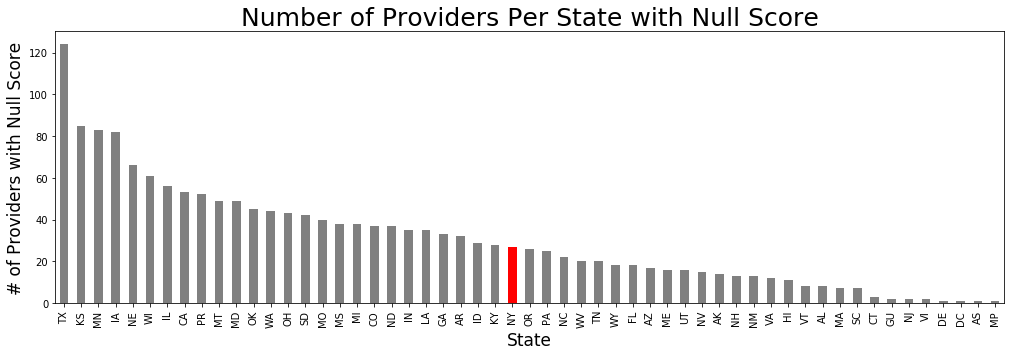

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.set_ylabel('# of Providers with Null Score',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Number of Providers Per State with Null Score', fontsize=25)
colors = []
mspb_count_na_ordered = mspb_count_na.sort_values('num_null',ascending=False)
for i in mspb_count_na_ordered['num_null']:
    if i==27:
        colors.append('red')
    else:
        colors.append('gray')
mspb_count_na['num_null'].sort_values(ascending=False).plot.bar(figsize=(17,5),color=colors,ax=ax)

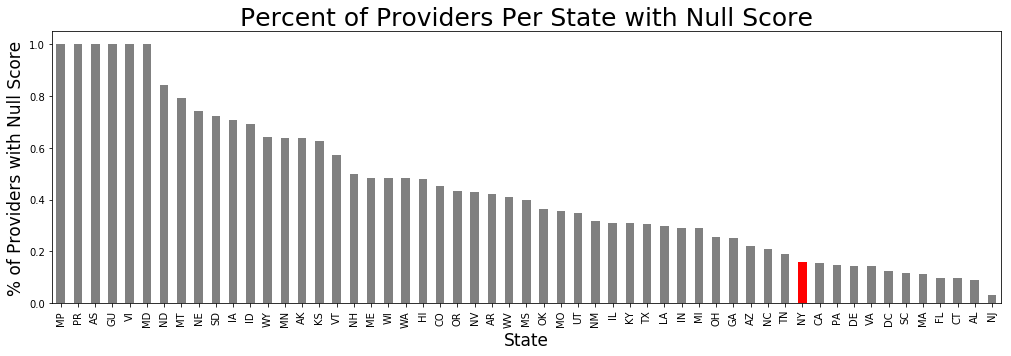

In [17]:
mspb_count_na_ord_per = mspb_count_na.sort_values('Perc_null_Score',ascending=False)
fig = plt.figure()
ax = plt.axes()
ax.set_ylabel('% of Providers with Null Score',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Percent of Providers Per State with Null Score', fontsize=25)
colors = []
mspb_count_na_ord_per = mspb_count_na.sort_values('Perc_null_Score',ascending=False)
for i in mspb_count_na_ord_per['Perc_null_Score']:
    if i == mspb_count_na_ord_per.iloc[43][2]:
        colors.append('red')
    else:
        colors.append('gray')
mspb_count_na['Perc_null_Score'].sort_values(ascending=False).plot.bar(figsize=(17,5),color=colors,ax=ax)

In general, some states are over-represented in the missing data analysis, which means that it may be more difficult to use this dataset for those states. Looking specifically at New York, we see that New York has 27 providers with null Scores, which is is in the middle of the group when compared with other states. However, New York has one of the lowest percentage null scores out of all states, at 15.9% and shown in the above graph, so **we will continue to move forward analyzing New York since there seems to be a lot of data for this state. **

# 5. Data Analysis

## a) Distributions of Score

In [18]:
mspb['Score'].describe() 

count    3122.000000
mean        0.986608
std         0.085436
min         0.480000
25%         0.940000
50%         0.990000
75%         1.030000
max         2.370000
Name: Score, dtype: float64

**There are 3,122 counts of Score. The range of Score goes from 0.48 to 2.37, with a 50th percentile value of 0.99.** This is expected, since the Score per provider is in general compared against a median Score, where all providers with Score>1 have higher costs compared to the median provider vs. providers with Score<1 have lower costs overall.

Text(0.5,1,'Score Distribution Across US Hospitals')

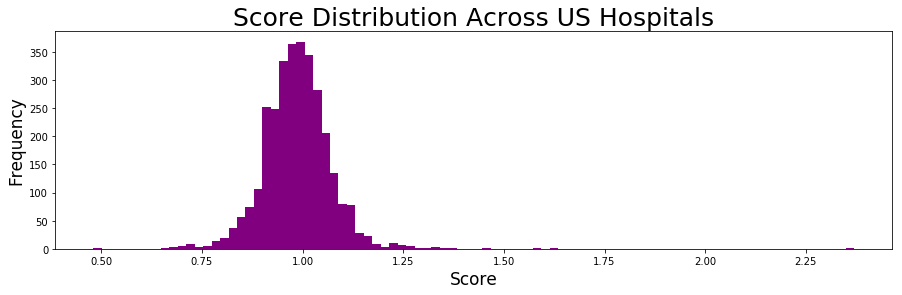

In [19]:
fig = plt.figure()
ax = plt.axes()
mspb['Score'].plot.hist(figsize=(15,4),color='purple',ax=ax,bins=90)
ax.set_xlabel('Score',fontsize=17)
ax.set_ylabel('Frequency',fontsize=17)
ax.set_title('Score Distribution Across US Hospitals', fontsize=25)

## b) Distributions of Score by Geography

In [20]:
mspb['State'].describe()

count     4784
unique      56
top         TX
freq       405
Name: State, dtype: object

Above we see that there are 56 unique "States" (which include areas like Guam, Washington, D.C., etc.). Texas has the most number of providers per state. Below is a list of the average Score per state.

In [7]:
mspb_avg_score_state = mspb.groupby('State', as_index=False)['Score'].mean()
mspb_avg_score_state

,State,Score
0,AK,0.858750
1,AL,0.996024
2,AR,0.996818
3,AS,NaN
4,AZ,0.948333
5,CA,0.989895
6,CO,0.969111
7,CT,0.998214
8,DC,1.005714
9,DE,0.993333


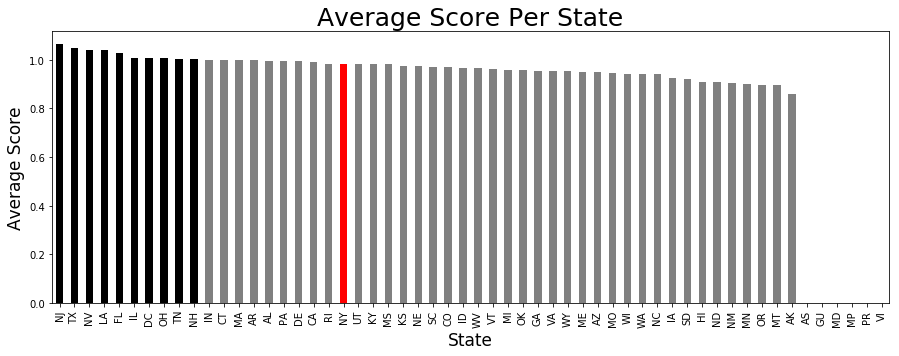

In [22]:
fig, ax = plt.subplots()
ax.set_ylabel('Average Score',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Average Score Per State', fontsize=25)
colors = []
mspb_avg_score_state_ord = mspb_avg_score_state.sort_values('Score',ascending=False)
for i in mspb_avg_score_state_ord['Score']:
    if i == mspb_avg_score_state_ord.iloc[19][1]:
        colors.append('red')
    elif i>1:
        colors.append('black')
    else:
        colors.append('gray')
mspb_avg_score_state.sort_values('Score',ascending=False).plot.bar(x='State',y='Score',figsize=(15,5), color=colors,legend=None, ax=ax)

The graph above shows the average score per state. **The bars in black are the states where the average score is above 1, which means that the hospitals are more costly than the national median**, on average. **New York is highlighted in red**, showing that the average Score is below 1, which means that NY is doing better than the median national hospital when it comes to overall costs for Medicare. **If Medicare wants to control its costs more, it may look to states like NJ, where the average Score is >1, to see how it could bring those costs closer to the national median.**

## c) Deep Dive into New York Providers

Below is a dataframe isolating only the providers in the state of New York.

In [23]:
mspb_NY = mspb.loc[mspb['State']=='NY']
mspb_NY

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date,Location
4,330049,NORTHERN DUTCHESS HOSPITAL,6511 SPRINGBROOK AVENUE,RHINEBECK,NY,12572,DUTCHESS,(845) 871-3391,Medicare hospital spending per patient (Medica...,MSPB-1,0.97,NaN,1/1/17,12/31/17,"6511 SPRINGBROOK AVENUE RHINEBECK, NY 12572"
8,330055,NEW YORK-PRESBYTERIAN/QUEENS,56-45 MAIN STREET,FLUSHING,NY,11355,QUEENS,(718) 670-2000,Medicare hospital spending per patient (Medica...,MSPB-1,1.02,NaN,1/1/17,12/31/17,"56-45 MAIN STREET FLUSHING, NY 11355"
9,330085,AURELIA OSBORN FOX MEMORIAL HOSPITAL,ONE NORTON AVENUE,ONEONTA,NY,13820,OTSEGO,(607) 432-2000,Medicare hospital spending per patient (Medica...,MSPB-1,0.92,NaN,1/1/17,12/31/17,"ONE NORTON AVENUE ONEONTA, NY 13820"
36,330304,WHITE PLAINS HOSPITAL CENTER,41 EAST POST R0AD,WHITE PLAINS,NY,10601,WESTCHESTER,(914) 681-0600,Medicare hospital spending per patient (Medica...,MSPB-1,1.04,NaN,1/1/17,12/31/17,"41 EAST POST R0AD WHITE PLAINS, NY 10601"
54,330181,GLEN COVE HOSPITAL,101 ST ANDREWS LANE,GLEN COVE,NY,11542,NASSAU,(516) 674-7300,Medicare hospital spending per patient (Medica...,MSPB-1,1.09,NaN,1/1/17,12/31/17,"101 ST ANDREWS LANE GLEN COVE, NY 11542"
67,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,NY,11040,NASSAU,(718) 470-7000,Medicare hospital spending per patient (Medica...,MSPB-1,1.04,NaN,1/1/17,12/31/17,"270 - 05 76TH AVENUE NEW HYDE PARK, NY 11040"
90,331303,CATSKILL REGIONAL MEDICAL CENTER - G HERMANN SITE,8081 ROUTE 97,CALLICOON,NY,12723,SULLIVAN,(845) 887-5530,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,5 - Results are not available for this reporti...,1/1/17,12/31/17,"8081 ROUTE 97 CALLICOON, NY 12723"
120,330044,FAXTON-ST LUKE'S HEALTHCARE,1656 CHAMPLIN AVENUE,UTICA,NY,13503,ONEIDA,(315) 798-6000,Medicare hospital spending per patient (Medica...,MSPB-1,1.02,NaN,1/1/17,12/31/17,"1656 CHAMPLIN AVENUE UTICA, NY 13503"
182,330136,MARY IMOGENE BASSETT HOSPITAL,ONE ATWELL ROAD,COOPERSTOWN,NY,13326,OTSEGO,(607) 547-3456,Medicare hospital spending per patient (Medica...,MSPB-1,1.00,NaN,1/1/17,12/31/17,"ONE ATWELL ROAD COOPERSTOWN, NY 13326"
196,330198,SOUTH NASSAU COMMUNITIES HOSPITAL,ONE HEALTHY WAY,OCEANSIDE,NY,11572,NASSAU,(516) 632-3000,Medicare hospital spending per patient (Medica...,MSPB-1,1.05,NaN,1/1/17,12/31/17,"ONE HEALTHY WAY OCEANSIDE, NY 11572"


In [24]:
mspb_NY['Score'].describe()

count    143.000000
mean       0.982517
std        0.070105
min        0.810000
25%        0.930000
50%        0.980000
75%        1.030000
max        1.200000
Name: Score, dtype: float64

As shown in the above data, there are 143 providers, with a mean Score of 0.98. Since we are living in New York City, we want to further isolate the providers that are in Manhattan, as shown below.

In [25]:
mspb_NYNY = mspb_NY.loc[mspb['City']=='NEW YORK']
mspb_NYNY

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date,Location
312,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,NY,10029,NEW YORK,(212) 241-7981,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,NaN,1/1/17,12/31/17,"ONE GUSTAVE L LEVY PLACE NEW YORK, NY 10029"
432,330046,MOUNT SINAI WEST,1000 TENTH AVENUE,NEW YORK,NY,10019,NEW YORK,(212) 523-4000,Medicare hospital spending per patient (Medica...,MSPB-1,1.02,NaN,1/1/17,12/31/17,"1000 TENTH AVENUE NEW YORK, NY 10019 (40.77012..."
448,330119,LENOX HILL HOSPITAL,100 EAST 77TH STREET,NEW YORK,NY,10021,NEW YORK,(212) 439-2345,Medicare hospital spending per patient (Medica...,MSPB-1,1.02,NaN,1/1/17,12/31/17,"100 EAST 77TH STREET NEW YORK, NY 10021 (40.77..."
1340,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,NEW YORK,(212) 263-7300,Medicare hospital spending per patient (Medica...,MSPB-1,1.05,NaN,1/1/17,12/31/17,"550 FIRST AVENUE NEW YORK, NY 10016 (40.74226,..."
1716,330101,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,NY,10065,NEW YORK,(212) 746-5454,Medicare hospital spending per patient (Medica...,MSPB-1,1.01,NaN,1/1/17,12/31/17,"525 EAST 68TH STREET NEW YORK, NY 10065 (40.76..."
1844,330240,HARLEM HOSPITAL CENTER,506 LENOX AVENUE,NEW YORK,NY,10037,NEW YORK,(212) 491-8400,Medicare hospital spending per patient (Medica...,MSPB-1,1.06,NaN,1/1/17,12/31/17,"506 LENOX AVENUE NEW YORK, NY 10037 (40.814482..."
1918,330199,METROPOLITAN HOSPITAL CENTER,1901 FIRST AVENUE,NEW YORK,NY,10029,NEW YORK,(212) 423-6262,Medicare hospital spending per patient (Medica...,MSPB-1,0.92,NaN,1/1/17,12/31/17,"1901 FIRST AVENUE NEW YORK, NY 10029 (40.78472..."
2124,330387,ROCKEFELLER UNIVERSITY HOSPITAL,1230 YORK AVENUE,NEW YORK,NY,10021,NEW YORK,(212) 570-8000,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,19 - Data are shown only for hospitals that pa...,1/1/17,12/31/17,"1230 YORK AVENUE NEW YORK, NY 10021 (40.763049..."
2147,330100,N Y EYE AND EAR INFIRMARY,230 SECOND AVE,NEW YORK,NY,10003,NEW YORK,(212) 979-4000,Medicare hospital spending per patient (Medica...,MSPB-1,NaN,1 - The number of cases/patients is too few to...,1/1/17,12/31/17,"230 SECOND AVE NEW YORK, NY 10003 (40.732559, ..."
2641,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NEW YORK,(212) 606-1000,Medicare hospital spending per patient (Medica...,MSPB-1,0.99,NaN,1/1/17,12/31/17,"535 EAST 70TH STREET NEW YORK, NY 10021 (40.76..."


In [26]:
mspb_NYNY['Score'].describe()

count    10.000000
mean      0.997000
std       0.051865
min       0.900000
25%       0.982500
50%       1.015000
75%       1.020000
max       1.060000
Name: Score, dtype: float64

In [27]:
mspb_NYNY['Score'].std()

0.051865209919559764

In [28]:
mspb_NYNY['Score'].mean()

0.9970000000000001

**There are 10 providers that are in New York City, with a mean score of 0.997 and a standard deviation of 0.052.** We next want to see how these numbers compare with the overall dataset and with New York State to better understand how NYC providers are controlling their costs.

Below are the data and a few graphs that show these data visually.

In [48]:
mspb_scorecompare = pd.DataFrame(columns=['National_Score','NYS_Score','NYC_Score','Index'])
mspb_scorecompare['Index']=['Mean','St_Dev']
mspb_scorecompare=mspb_scorecompare.set_index(mspb_scorecompare['Index'])
mspb_scorecompare=mspb_scorecompare.drop('Index',1)
mspb_scorecompare['National_Score']=mspb['Score'].mean(),mspb['Score'].std()
mspb_scorecompare['NYS_Score']=mspb_NY['Score'].mean(),mspb_NY['Score'].std()
mspb_scorecompare['NYC_Score']=mspb_NYNY['Score'].mean(),mspb_NYNY['Score'].std()
mspb_scorecompare_tr = mspb_scorecompare.transpose()
mspb_scorecompare_tr

Index,Mean,St_Dev
National_Score,0.986608,0.085436
NYS_Score,0.982517,0.070105
NYC_Score,0.997000,0.051865


Text(0.5,1,'Mean Score')

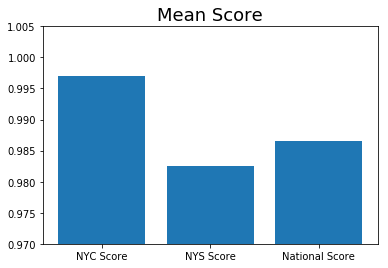

In [31]:
fig = plt.figure()
ax = plt.axes()
plt.bar(['National Score','NYS Score','NYC Score'],[mspb['Score'].mean(),mspb_NY['Score'].mean(),mspb_NYNY['Score'].mean()])
plt.ylim(0.97,1.005)
ax.set_title('Mean Score', fontsize=18)

Text(0.5,1,'St. Dev. Score')

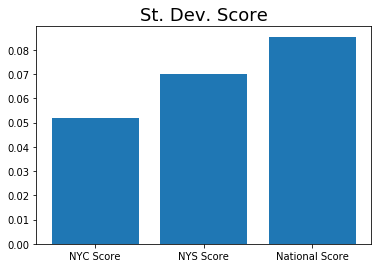

In [32]:
fig = plt.figure()
ax = plt.axes()
plt.bar(['National Score','NYS Score','NYC Score'],[mspb['Score'].std(),mspb_NY['Score'].std(),mspb_NYNY['Score'].std()])
ax.set_title('St. Dev. Score', fontsize=18)

Above we see that NYC has a higher mean Score than both NYS providers and all national providers. We also see that NYC has a lower standard deviation than the other two groups. A takeaway from this understanding is that NYC providers have higher costs than other providers, and that in general there is less of a difference in cost control between NYC providers than between NYS providers or national providers.

In essence, **NYC providers all tend to cost more, with less variability in the cost structure, than compared with the other two groups.** Below are two more graphs that show these comparisons.

Text(0.5,0.5,'0.5')

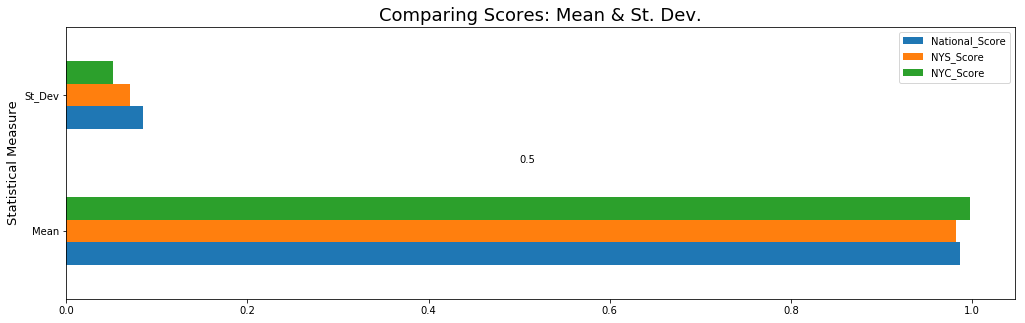

In [33]:
fig = plt.figure()
ax = plt.axes()
pd.concat([mspb_scorecompare]).plot.barh(ax=ax,figsize=(17,5))
ax.set_ylabel('Statistical Measure',fontsize=13)
ax.set_title('Average Score Per State', fontsize=25)
ax.set_title('Comparing Scores: Mean & St. Dev.', fontsize=18)
plt.text(0.5,0.5,0.5)

Text(0,0.5,'Standard Deviation')

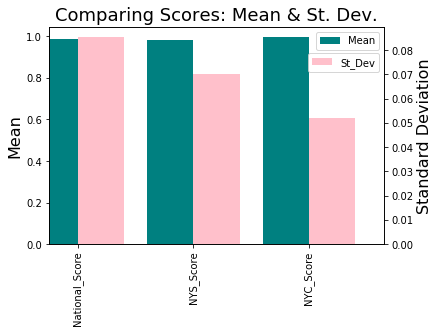

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width=0.4
mspb_scorecompare_tr.Mean.plot(kind='bar', color='teal', ax=ax, width=width, position=1)
mspb_scorecompare_tr.St_Dev.plot(kind='bar', color='pink', ax=ax2, width=width, position=0)
ax.set_ylabel('Mean',fontsize=16)
ax.set_title('Comparing Scores: Mean & St. Dev.', fontsize=18)
ax.legend(loc='upper right')
ax2.legend(loc='upper right',bbox_to_anchor=(0.5, 0.4, 0.5, 0.5))
ax2.set_ylabel('Standard Deviation',fontsize=16)

## d) Relationship of Score with Volume of Discharges per State

Below the Provider Volume per State database is imported and with the columns cleaned for better analysis. We wanted to better understand if state population numbers affect how the hospital is able to control costs. The data that best represents population numbers are the number of discharges and the number of providers. A question we want to answer is: **As the number of patients an individual provider sees increases, is the provider more likely or less likely to be better at controlling costs?**

In [4]:
#Importing data of the number of providers per state with a Score and the number of discharges
prov = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/Providers_per_State.csv")
prov = prov.drop('Unnamed: 0',axis=1)
prov = prov.drop('good_providers_percentage',axis=1)
prov = prov.drop('good_providers',axis=1)
volume = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/Provider_Volume.csv")
volume = volume.drop('Unnamed: 0',axis=1)
volume = volume.drop('Number_of_Providers',axis=1)
volume.rename(columns={'Number of Discharges':'Number_of_Discharges'},inplace=True)
volume = pd.merge(volume, prov, on='State', how='outer')
volume

,State,Number_of_Discharges,Number_of_Providers
0,AK,5149,8
1,AL,93442,84
2,AR,62945,45
3,AZ,77277,61
4,CA,306870,294
5,CO,41429,50
6,CT,63845,30
7,DC,11444,7
8,DE,23325,6
9,FL,346678,168


Now we will merge the dataframes to yield a dataframe with the average score, number of discharges, and number of providers per state.

In [8]:
mspb_state = pd.merge(mspb_avg_score_state, volume, on='State', how='outer')
mspb_state

,State,Score,Number_of_Discharges,Number_of_Providers
0,AK,0.858750,5149.0,8.0
1,AL,0.996024,93442.0,84.0
2,AR,0.996818,62945.0,45.0
3,AS,NaN,NaN,NaN
4,AZ,0.948333,77277.0,61.0
5,CA,0.989895,306870.0,294.0
6,CO,0.969111,41429.0,50.0
7,CT,0.998214,63845.0,30.0
8,DC,1.005714,11444.0,7.0
9,DE,0.993333,23325.0,6.0


In [9]:
mspb_state_ord = mspb_state.sort_values('Score',ascending=False)
mspb_state_ord

,State,Score,Number_of_Discharges,Number_of_Providers
34,NJ,1.063750,161801.0,64.0
47,TX,1.049537,296554.0,306.0
36,NV,1.041000,29157.0,22.0
20,LA,1.040602,68210.0,89.0
10,FL,1.027289,346678.0,168.0
16,IL,1.006532,221735.0,126.0
8,DC,1.005714,11444.0,7.0
38,OH,1.005120,173955.0,128.0
46,TN,1.004767,126366.0,89.0
33,NH,1.002308,26842.0,13.0


Now that we have the dataframe of interest, we are going to visualize this data to see **the relationship between the variables Number of Discharges and Number of Providers on Score.**

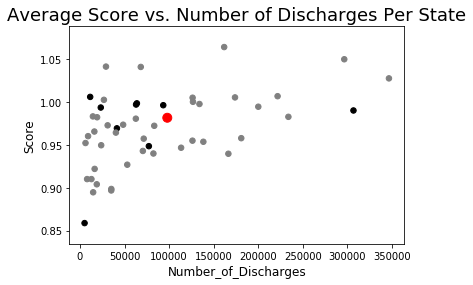

In [10]:
fig = plt.figure()
ax = plt.axes()
ax.set_ylabel('Average Score',fontsize=12)
ax.set_xlabel('Number of Discharges in State',fontsize=12)
ax.set_title('Average Score vs. Number of Discharges Per State', fontsize=18)
colors = []
size = []
mspb_state_ord = mspb_state.sort_values('Score',ascending=False)
for i in mspb_state_ord['Score']:
    if i == mspb_state_ord.iloc[19][1]:
        colors.append('red')
        size.append(80)
    elif i>1:
        colors.append('black')
        size.append(30)
    else:
        colors.append('gray')
        size.append(30)
mspb_state.plot.scatter(x='Number_of_Discharges',y='Score',ax=ax,color=colors,s=size)

The above graph shows NY state in red, most other states in gray, and the states with a mean Score > 1 in black. **Overall, we see a positive correlation between the Number of Discharges and the mean Score per state.**

The below graph shows similar data with the Number of Providers instead. Again, **the red dot is NY state, most other states are in gray, and the states with a mean Score > 1 are in black.**

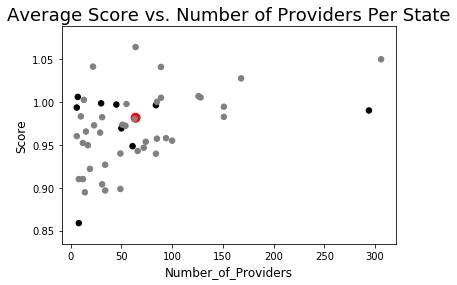

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.set_ylabel('Average Score',fontsize=12)
ax.set_xlabel('Number of Providers in State',fontsize=12)
ax.set_title('Average Score vs. Number of Providers Per State', fontsize=18)
colors = []
size = []
mspb_state_ord = mspb_state.sort_values('Score',ascending=False)
for i in mspb_state_ord['Score']:
    if i == mspb_state_ord.iloc[19][1]:
        colors.append('red')
        size.append(80)
    elif i>1:
        colors.append('black')
        size.append(30)
    else:
        colors.append('gray')
        size.append(30)
mspb_state.plot.scatter(x='Number_of_Providers',y='Score',ax=ax,color=colors,s=size)

In [12]:
reg = smf.ols('Score ~ Number_of_Discharges', data=mspb_state).fit()

In [13]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     14.09
Date:                Sat, 04 May 2019   Prob (F-statistic):           0.000471
Time:                        18:29:58   Log-Likelihood:                 93.427
No. Observations:                  50   AIC:                            -182.9
Df Residuals:                      48   BIC:                            -179.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9478 

The regression above is looking for a linear relationship between Number of Discharges and the Score for each provider. The R^2 is approximately 23%, which means that **about 23% of the Score variability can be explained by differences in the Number of Discharges.**

In [14]:
reg.params['Number_of_Discharges']*100000

0.024170608907655274

Above we see that **with 100,000 more discharges per provider, the Score goes up by 2.4%.**

This data shows that **providers cost Medicare more on average as their patient turnover volumes go up.** This is an interesting observation, since one may assume that as providers see more patients they are more adept at treating them and may be more able to keep costs down. However, this regression shows the opposite occurring. **This observation may push Medicare to instead focus on smaller hospitals, rather than larger hospitals, to understand how to encourage hospitals control costs.**

**In general, this data and analysis is useful for Medicare to understand where their higher costs come from, and then to dive into the providers and states that have lower overall Scores to determine best practices that may be shared with other providers across the country to control healthcare costs.** 

We also see that **where we live, NYC, Providers tend to cost more per patient, which is what we expected.** Providers in NYC are large institutional hospitals with generally very high-quality care and nationally and internationally renowned physicians.

Next, we want to examine patient outcomes, through focusing on patient readmission rates, to try to relate cost findings to actual patient health outcomes.

# Part II
## Hospital Readmissions Reduction Program
### *Data Source: HealthData.gov*
#### https://healthdata.gov/dataset/hospital-readmissions-reduction-program

# 1. Dataset Description
This dataset is used for the Hospital Readmissions Reduction Program, mandated by the Affordable Care Act, requiring the Centers for Medicare & Medicaid (CMS) to reduce payments to Inpatient Prospective Payment System (IPPS) hospitals with excess readmissions. Excess readmissions rates (ERRs) are measured by a ratio, calculated by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG) by the number that would be “expected,” based on an average hospital with similar patients. Therefore, providers with lower ERR scores would be considered better by CMS standards.

## Objectives

1. Examine the excess readmission rates of providers across the country.
2. Test whether excess readmission rates are impacted by the volume of patients that a provider handles.
3. Find the overall best ERR rated providers in the country.
4. Test whether expensive providers with higher costs of treatment have better ERR scores.
5. Examine the spread of good providers with low excess readmission rates across all US states.
6. Check whether ERR and actual readmission rates are correlated.
7. Find the best providers in New York state for the six medical conditions that are mentioned above.
8. Asses the chances of readmission for each of the medical conditions.
9. Describe the prevalence of each medical condition. 

In [4]:
hrrp = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/Hospital_Readmissions_Reduction_Program.csv",
                  na_values=["Not Available"])
hrrp

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217.0,NaN,1.0195,20.9722,20.5712,47.0,07/01/2014,06/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259.0,NaN,1.0773,23.9788,22.2578,67.0,07/01/2014,06/30/2017
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017
5,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_PN_HRRP,213.0,NaN,1.1031,19.2445,17.4459,47.0,07/01/2014,06/30/2017
6,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_AMI_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017
7,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_CABG_HRRP,NaN,5 - Results are not available for this reporti...,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017
8,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_COPD_HRRP,NaN,5 - Results are not available for this reporti...,1.0024,18.0061,17.9630,NaN,07/01/2014,06/30/2017
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75.0,NaN,0.9726,19.6816,20.2355,13.0,07/01/2014,06/30/2017


# 2. Key Variable Definitions

**Provider ID:** This is the ID number that Medicare uses to identify each provider, which includes hospitals and other health centers.

**Measure Name:** This is what Medicare is measuring in the dataset. In this dataset, Medicare is specifically examining the readmission rates per six different medical condintions for each of the providers. The six medical conditions are: heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG).

**Number of Readmissions:** The number of times a readmission occured. Readmission is defined as an admission to an IPPS acute care hospital within 30 days of a discharge.

**Predicted Readmission Rate:** The number of readmissions (following discharge for medical condition) that would be anticipated in the particular provider, given the patient case mix and the hospital's unique quality of care effect on readmission.

**Expected Readmission Rate:** The number of readmissions (following discharge for medical condition) that would be expected if the same patients with the same characteristics had instead been treated at an "average" hospital, given the "average" hospital's quality of care effect on readmission for patients with that condition.

**Excess Readmission Rate:** A hospital’s excess readmission ratio for each condition is a measure of a hospital’s readmission performance compared to the national average for the hospital’s set of patients with that applicable
condition.
If a hospital performs better than an average hospital that admitted similar patients, the ratio will be less
than 1.0000. If a hospital performs worse than average, the ratio will be greater than 1.0000.

***Note:*** All readmission ratios are based on 30-day interval predictions.

**Start/End Dates:** Represent the start and end time for when the data was collected.

# 3. Summary Statistics

In [5]:
hrrp['Provider ID'].nunique()

3279

In [6]:
len(hrrp.index)

19674

There are 19,674 rows and 3279 Provider IDs.

In [7]:
providers = hrrp.groupby('State')['Provider ID'].nunique().reset_index().sort_values('Provider ID', ascending=False).rename(columns={'Provider ID':'Number_of_Providers'})
providers

,State,Number_of_Providers
43,TX,306
4,CA,294
9,FL,168
38,PA,151
34,NY,151
35,OH,128
14,IL,126
10,GA,100
22,MI,94
18,LA,89


In [10]:
providers.to_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/Providers_per_State.csv")

Above we see a list of the number of providers per state, and below is this data in visualized form.

Text(0.5,1,'Number of Providers Per State (Overall)')

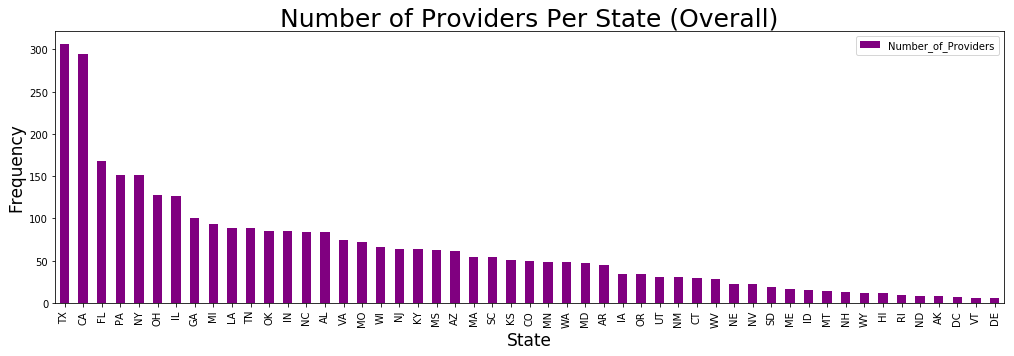

In [11]:
fig = plt.figure()
ax = plt.axes()
providers.plot.bar(x='State', y='Number_of_Providers', ax=ax, figsize=(17,5),color='purple')
ax.set_ylabel('Frequency',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Number of Providers Per State (Overall)', fontsize=25)

In [12]:
Coefficient_of_variation = providers['Number_of_Providers'].std()/providers['Number_of_Providers'].mean()
Coefficient_of_variation

0.9797943593237208

There seems to be a great difference between the number of providers in each state.  

To verify that our sample data is a good representation of providers across the entire US, we will check for the number of providers, depending on the the size of the population in a given state. For that, we retrieve population size data from census.gov:
https://www.census.gov/search-results.html?q=state+population&page=1&stateGeo=none&searchtype=web&cssp=SERP&_charset_=UTF-8

In [15]:
population = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/Population_Estimates_by_State.csv")
population

,States,Population
0,Alabama,"4,887,871"
1,Alaska,"737,438"
2,Arizona,"7,171,646"
3,Arkansas,"3,013,825"
4,California,"39,557,045"
5,Colorado,"5,695,564"
6,Connecticut,"3,572,665"
7,Delaware,"967,171"
8,District of Columbia,"702,455"
9,Florida,"21,299,325"


Since the data includes full state names, we will have to match each state full name to its correct abbreviation:

In [16]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP',
    'Puerto Rico': 'PR',
    'District of Columbia': 'DC'
}

In [17]:
population['States_Abbrev'] = population['States'].map(us_state_abbrev, na_action='ignore')
population = population.rename(columns = {'States_Abbrev':'State'})
population = population.drop(['States'], axis=1)
population

,Population,State
0,"4,887,871",AL
1,"737,438",AK
2,"7,171,646",AZ
3,"3,013,825",AR
4,"39,557,045",CA
5,"5,695,564",CO
6,"3,572,665",CT
7,"967,171",DE
8,"702,455",DC
9,"21,299,325",FL


Now we can merge our two datasets:

In [18]:
providers2 = providers.merge(population,on='State', how='left')
providers2

,State,Number_of_Providers,Population
0,TX,306,"28,701,845"
1,CA,294,"39,557,045"
2,FL,168,"21,299,325"
3,PA,151,"12,807,060"
4,NY,151,"19,542,209"
5,OH,128,"11,689,442"
6,IL,126,"12,741,080"
7,GA,100,"10,519,475"
8,MI,94,"9,995,915"
9,LA,89,"4,659,978"


In [19]:
providers2.dtypes

State                  object
Number_of_Providers     int64
Population             object
dtype: object

In [20]:
providers2['Population'] = providers2['Population'].str.replace(',', '')
providers2['Population'] = providers2['Population'].apply(pd.to_numeric)

Just to get a basic sense of provider volume, we assume that the population of potential patients are equally spread between all the providers in the state. So, we create a new column that gives us an estimate of the average population size treated by a single provider in all states:

In [21]:
providers2['Population_Per_Provider'] = providers2['Population']/providers2['Number_of_Providers']
providers2 = providers2.sort_values('Population_Per_Provider', ascending=False)
providers2

,State,Number_of_Providers,Population,Population_Per_Provider
50,DE,6,967171,161195.166667
27,WA,49,7535591,153787.571429
18,NJ,64,8908520,139195.625000
37,NV,22,3034392,137926.909091
1,CA,294,39557045,134547.772109
4,NY,151,19542209,129418.602649
28,MD,47,6042718,128568.468085
2,FL,168,21299325,126781.696429
22,MA,55,6902149,125493.618182
13,NC,84,10383620,123614.523810


Text(0.5,1,'Population Per Providers for each State')

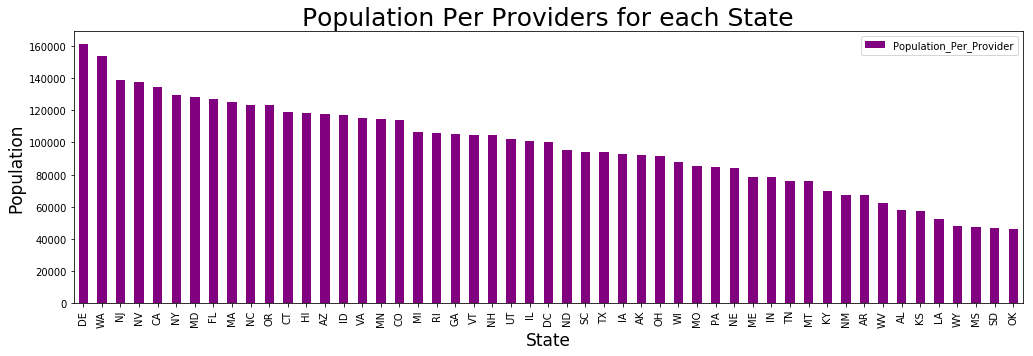

In [22]:
fig = plt.figure()
ax = plt.axes()
providers2.plot.bar(x='State', y='Population_Per_Provider', ax=ax, figsize=(17,5),color='purple')
ax.set_ylabel('Population',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Population Per Providers for each State', fontsize=25)

In [23]:
Coefficient_of_variation2 = providers2['Population_Per_Provider'].std()/providers2['Population_Per_Provider'].mean()
Coefficient_of_variation2

0.2957061923273317

We now see that while there are still differences between the states, our coefficient of variation is over 3 times smaller, meaning that we have a much better representation of providers per state than initially assumed.

In [24]:
Coefficient_of_variation/Coefficient_of_variation2

3.3134049429683174

### Cleanup Condition Names

We replace the values in the "Measure Name" column with their plain condition names: heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG).

In [25]:
hrrp['Measure Name'].unique()

array(['READM_30_AMI_HRRP', 'READM_30_CABG_HRRP', 'READM_30_COPD_HRRP',
       'READM_30_HF_HRRP', 'READM_30_HIP_KNEE_HRRP', 'READM_30_PN_HRRP'],
      dtype=object)

In [26]:
hrrp['Measure Name'] = hrrp['Measure Name'].map({'READM_30_AMI_HRRP': 'Heart Attack (AMI)',
                                                'READM_30_CABG_HRRP': 'Coronary Artery Bypass Graft Surgery (CABG)',
                                                'READM_30_COPD_HRRP': 'Chronic Obstructive Pulmonary Disease (COPD)',
                                                'READM_30_HF_HRRP': 'Heart Failure (HF)',
                                                'READM_30_HIP_KNEE_HRRP': 'Hip/Knee Replacement (THA/TKA)',
                                                'READM_30_PN_HRRP': 'Pneumonia (PN)'})

# 4. Missing Data

In [27]:
hrrp.isna().sum() 

Hospital Name                     0
Provider ID                       0
State                             0
Measure Name                      0
Number of Discharges           8019
Footnote                      11517
Excess Readmission Ratio       5394
Predicted Readmission Rate     5394
Expected Readmission Rate      5394
Number of Readmissions         8142
Start Date                        0
End Date                          0
dtype: int64

According to the above, we should check the impact of our missing data for the Readmission Rates and the Number of Discharges and Readmissions.

### Excess Readmission Ratio - Missing Value Impact

Number of NaNs in the Excess Readmission Ratio column:

In [81]:
hrrp['Excess Readmission Ratio'].isna().sum()

5394

Number of unique providers:

In [29]:
hrrp['Provider ID'].nunique() 

3279

Many providers have ratios for some conditions, but not for others, therefore we will average the ratios per provider and then check for nulls. Number of providers that don't have an ERR (Excess Readmission Ratio).

In [30]:
hrrp.groupby('Provider ID')['Excess Readmission Ratio'].mean().isnull().sum()

183

Percentage of providers with missing ERR:

In [31]:
hrrp.groupby('Provider ID')['Excess Readmission Ratio'].mean().isnull().sum()/hrrp['Provider ID'].nunique() 

0.055809698078682524

As we can see, more than 94% of the providers have have at least one Excess Readmission Ratio.   
The numbers are identical for the remaining two Readmission Ratio columns.

Furthermore, all states have a readmission ratio representation:

In [32]:
hrrp.groupby('State')['Excess Readmission Ratio'].mean().isnull().sum()

0

### Number of Readmissions and Discharges - Missing Value Impact

Same as before, we now check the number of providers that don't have an Discharges:

In [33]:
hrrp.groupby('Provider ID')['Number of Discharges'].mean().isnull().sum()

322

In [34]:
hrrp.groupby('Provider ID')['Number of Discharges'].mean().isnull().sum()/hrrp['Provider ID'].nunique() 

0.09820067093626106

Here our missing data is more significant, though we still have a representation for each state:

In [35]:
hrrp.groupby('State')['Number of Discharges'].mean().isnull().sum()

0

The data is similar for Readmissions amounts:

In [36]:
# Number of Readmissions check
hrrp.groupby('Provider ID')['Number of Readmissions'].mean().isnull().sum()

384

In [37]:
hrrp.groupby('Provider ID')['Number of Readmissions'].mean().isnull().sum()/hrrp['Provider ID'].nunique() 

0.1171088746569076

In [38]:
hrrp.groupby('State')['Number of Readmissions'].mean().isnull().sum()

0

# 5. Data Analysis

## a) ERR Ratio

Below we are getting a sense of the ERR distribution. Result is a normal curve:

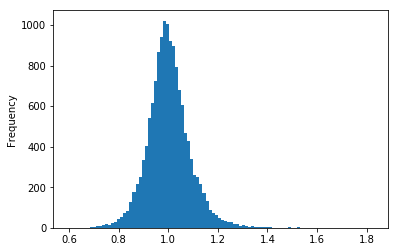

In [39]:
hrrp['Excess Readmission Ratio'].plot.hist(bins=100)

Getting a sense of the ERR distribution:

In [40]:
hrrp['Excess Readmission Ratio'].describe()

count    14280.000000
mean         1.002452
std          0.086871
min          0.598200
25%          0.950900
50%          0.997400
75%          1.049100
max          1.825600
Name: Excess Readmission Ratio, dtype: float64

There are 14,280 counts of Excess Readmission Ratios. The range of ERR goes from 0.598 to 1.825, with a 50th percentile value of 0.997. This is expected, since Predicted and Expected Readmission rates are built according to past average perfomances of providers.

We check to see if a similar distribution exists when averaging the ERR per provider across all 6 conditions: 

In [41]:
means = hrrp.groupby('Provider ID')['Excess Readmission Ratio'].mean()

In [42]:
means = means.to_frame(name='Provider_Avg_ERR')

In [43]:
hrrp = hrrp.merge(means,on='Provider ID')

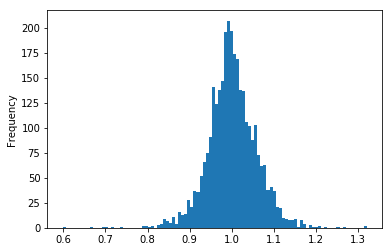

In [44]:
means['Provider_Avg_ERR'].plot.hist(bins=100)

In [45]:
means['Provider_Avg_ERR'].describe()

count    3096.000000
mean        1.001006
std         0.058669
min         0.598200
25%         0.967064
50%         0.998683
75%         1.034775
max         1.320800
Name: Provider_Avg_ERR, dtype: float64

As expected, we get a normal distribution here as well.

### Is the ERR score impacted by the volume of patients?

We test whether a bigger or smaller volume of patients has an impact on ERR scores. By using the Number of Discharges, we get a good sense of patient volume per condition within each provider.

In [46]:
hrrp_not_null = hrrp[pd.notnull(hrrp['Number of Discharges'])] #get rid of NaN Discharges

In [47]:
hrrp_not_null = hrrp_not_null[pd.notnull(hrrp_not_null['Excess Readmission Ratio'])] #get rid of NaN ERRs

Check correlation beetween volume of discharges and ERR score:

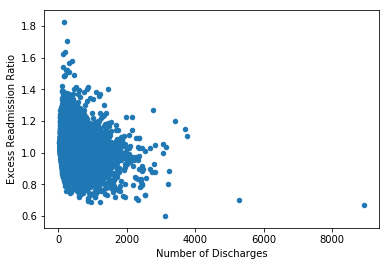

In [48]:
hrrp_not_null.plot.scatter(x = 'Number of Discharges', y = 'Excess Readmission Ratio' )

In [49]:
np.corrcoef(hrrp_not_null['Number of Discharges'], hrrp_not_null['Excess Readmission Ratio'])

array([[ 1.        , -0.12918926],
       [-0.12918926,  1.        ]])

In [50]:
pearsonr(hrrp_not_null['Number of Discharges'], hrrp_not_null['Excess Readmission Ratio'])

(-0.12918926123025648, 4.1535509958248627e-44)

We don't see a strong correlation, so we do not believe that volume directly impacts the ERR score

### Best overall hospitals in the country by ERR

Based on the ERR score, we group the dataset to show us the 10 providers in the country with the lowest ERR scores:

In [51]:
avgERR = hrrp.groupby(['Provider ID','State','Hospital Name'])[['Provider_Avg_ERR']].mean().reset_index().sort_values('Provider_Avg_ERR')
avgERR.head(10)

,Provider ID,State,Hospital Name,Provider_Avg_ERR
479,50769,CA,HOAG ORTHOPEDIC INSTITUTE,0.5982
2017,330270,NY,HOSPITAL FOR SPECIAL SURGERY,0.6697
2611,430089,SD,DUNES SURGICAL HOSPITAL,0.6958
2248,360266,OH,MOUNT CARMEL NEW ALBANY SURGICAL HOSPITAL,0.7038
194,40147,AR,ARKANSAS SURGICAL HOSPITAL,0.7152
2590,420102,SC,GHS PATEWOOD MEMORIAL HOSPITAL,0.7374
2330,370210,OK,"OKLAHOMA SURGICAL HOSPITAL, LLC",0.7881
3191,520194,WI,ORTHOPAEDIC HOSPITAL OF WISCONSIN,0.7913
1757,280129,NE,NEBRASKA ORTHOPAEDIC HOSPITAL,0.7947
1161,170183,KS,KANSAS SURGERY & RECOVERY CENTER,0.7980


### Is treatment cost correlated with ERR?

In this section, we check whether more expensive providers are also better in their ERR score. For this purpose, we bring in another dataset that includes, for each provider, the total payments that patients pay for medical treatment, including the amount of the payment that is covered by Medicare insurance.   
(This dataset is analyzed in depth in a seperate part of this paper)

In [53]:
spending = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/provider_spending.csv")

In [54]:
spending = spending.rename(columns={'Provider Id':'Provider ID', 'Average Total Payments':'Average_Total_Payments'})
spending.head()

,Unnamed: 0,Provider ID,Average_Total_Payments,Average Medicare Payments,Average Non Medicare Payments,Percent Non Medicare Payments
0,0,10001,10071.632321,8917.722321,1153.910000,0.155085
1,1,10005,7240.391299,5943.038442,1297.352857,0.196497
2,2,10006,9997.142358,8724.886423,1272.255935,0.176133
3,3,10007,5562.832632,4665.394211,897.438421,0.174030
4,4,10008,4912.750000,3787.490000,1125.260000,0.229958


In [55]:
len(spending.index)

3208

We see that the number of providers in our spending dataframe is smaller than the number of providers in our Readmission dataset. Therefore, we merge both datasets using the 'spending' dataframe as a basis:

In [56]:
spending = spending.merge(avgERR, on='Provider ID', how='left')
spending.head()

,Unnamed: 0,Provider ID,Average_Total_Payments,Average Medicare Payments,Average Non Medicare Payments,Percent Non Medicare Payments,State,Hospital Name,Provider_Avg_ERR
0,0,10001,10071.632321,8917.722321,1153.910000,0.155085,AL,SOUTHEAST ALABAMA MEDICAL CENTER,1.040567
1,1,10005,7240.391299,5943.038442,1297.352857,0.196497,AL,MARSHALL MEDICAL CENTER SOUTH,0.989000
2,2,10006,9997.142358,8724.886423,1272.255935,0.176133,AL,ELIZA COFFEE MEMORIAL HOSPITAL,1.072800
3,3,10007,5562.832632,4665.394211,897.438421,0.174030,AL,MIZELL MEMORIAL HOSPITAL,1.060425
4,4,10008,4912.750000,3787.490000,1125.260000,0.229958,AL,CRENSHAW COMMUNITY HOSPITAL,0.986633


We can now check the correlation between the payments the provider receives for treatments and the provider's ERR score:

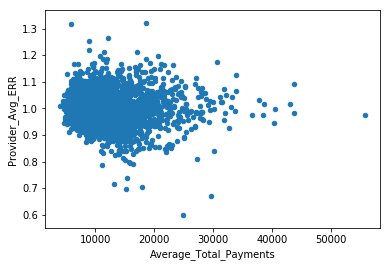

In [57]:
spending.plot.scatter(x = 'Average_Total_Payments', y = 'Provider_Avg_ERR' )

In [58]:
reg_ERR = smf.ols('Provider_Avg_ERR ~ Average_Total_Payments', data=spending).fit()

In [59]:
print(reg_ERR.summary())

                            OLS Regression Results                            
Dep. Variable:       Provider_Avg_ERR   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     15.29
Date:                Mon, 06 May 2019   Prob (F-statistic):           9.41e-05
Time:                        14:34:50   Log-Likelihood:                 4338.0
No. Observations:                3064   AIC:                            -8672.
Df Residuals:                    3062   BIC:                            -8660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

As we see above, there doesn't seem to be a connection between how expensive a provider is and its ERR score.

### State provider quality based on ERR

Since we know that ERR scores below 1 are considered good, we will now check the ratio of "good" providers within a state.

We first add a new column, "good" = 1 and "bad" = 0. If a provider has an ERR score that is lower than or equal to 1, the provider is considered good. Above 1 is considered bad:

In [60]:
hrrp['Avg_ERR_Status'] = np.where(hrrp['Provider_Avg_ERR']<=1, 1, 0)

We create a list of the number good providers in each state:

In [61]:
good_providers = hrrp.groupby('State')['Avg_ERR_Status'].sum()/6
#we divide by 6 because each provider shows up 6 times, one per condition

Now we map our dataframe of providers per state with our list of good providers per state.   
Then we create a new column that shows the percentage of good providers in each state.

In [62]:
providers['good_providers'] = providers['State'].map(good_providers, na_action='ignore')
providers['good_providers_percentage'] = providers['good_providers']/providers['Number_of_Providers']

In [64]:
providers = providers.sort_values('good_providers_percentage', ascending=False)
providers

,State,Number_of_Providers,good_providers,good_providers_percentage
11,HI,12,11.0,0.916667
0,AK,8,7.0,0.875000
44,UT,31,27.0,0.870968
8,DE,6,5.0,0.833333
48,WI,66,55.0,0.833333
29,NE,23,19.0,0.826087
12,IA,34,27.0,0.794118
41,SD,19,15.0,0.789474
26,MT,14,11.0,0.785714
5,CO,50,39.0,0.780000


Above we can see a list of states and the percentage of "good" providers within that state.   
Below we chart this data, and states that have less than 50% of "Good" providers are colored in red.

Text(0.5,1,'Percentage of Good Providers per State')

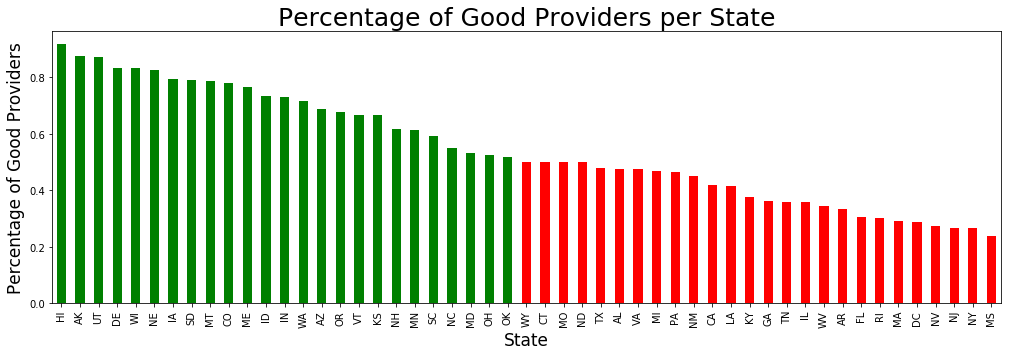

In [65]:
fig = plt.figure()
ax = plt.axes()
colors = (providers['good_providers_percentage']>0.5).map({True: 'g', False: 'r'})
providers.plot.bar(x='State', y='good_providers_percentage', ax=ax, figsize=(17,5),color=colors, legend=False)
ax.set_ylabel('Percentage of Good Providers',fontsize=17)
ax.set_xlabel('State',fontsize=17)
ax.set_title('Percentage of Good Providers per State', fontsize=25)

## b) NY State Analysis

As we can see above, NY state is second to last in terms of good provider coverage so we aim to find the best providers in the state for each condition.

### Within NY state, which providers should you go to for each condition?

For this analysis, we decided to test a different metric. Instead of using the given ratios, we create a new ratio "Actual Readmission Ration", based on the number of readmissions divided by number of discharges. 

In [66]:
hrrp['Actual_Readmission_Ratio'] = hrrp['Number of Readmissions']/hrrp['Number of Discharges']

Filtering for NY:

In [67]:
NYdata = hrrp.loc[hrrp['State'] == 'NY']

In [68]:
NYdata = NYdata[pd.notnull(NYdata['Actual_Readmission_Ratio'])]

To check the validity of our Actual Readmission Ratio, we check its correlation with the Predicted Readmission Rate:

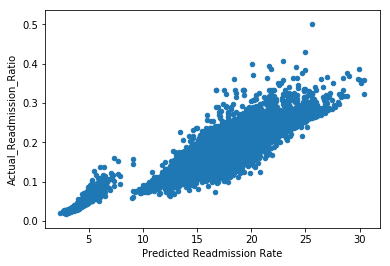

In [69]:
hrrp.plot.scatter(x = 'Predicted Readmission Rate', y = 'Actual_Readmission_Ratio' )

In [70]:
x = hrrp[['Predicted Readmission Rate','Actual_Readmission_Ratio']]

In [71]:
x = x.dropna()

In [72]:
np.corrcoef(x['Predicted Readmission Rate'], x['Actual_Readmission_Ratio'])

array([[1.        , 0.93303794],
       [0.93303794, 1.        ]])

In [73]:
pearsonr(x['Predicted Readmission Rate'], x['Actual_Readmission_Ratio'])

(0.9330379380515933, 0.0)

In [74]:
hrrp = hrrp.rename(columns={'Predicted Readmission Rate': 'Predicted_Readmission_Rate'})

In [75]:
reg_ARR = smf.ols('Actual_Readmission_Ratio ~ Predicted_Readmission_Rate', data=hrrp).fit()

In [76]:
print(reg_ARR.summary())

                               OLS Regression Results                               
Dep. Variable:     Actual_Readmission_Ratio   R-squared:                       0.871
Model:                                  OLS   Adj. R-squared:                  0.871
Method:                       Least Squares   F-statistic:                 7.755e+04
Date:                      Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                              14:38:02   Log-Likelihood:                 27556.
No. Observations:                     11532   AIC:                        -5.511e+04
Df Residuals:                         11530   BIC:                        -5.509e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

As we can see, these two ratios are highly correlated with a high T score and high R-squared, which makes sense as the Predicted Readmission Rate is built based on the actual performance of the providers.

Below we create a new table that shows which Hospitals rank highest at actual readmission ratios for each condition within NY state.

In [77]:
df = pd.DataFrame()
for i in NYdata['Measure Name'].unique(): 
    df.loc[i,'Rank1'] = NYdata.sort_values('Actual_Readmission_Ratio').loc[NYdata['Measure Name']==i,'Hospital Name'].iloc[0]
    df.loc[i,'ARR Score1'] = NYdata.sort_values('Actual_Readmission_Ratio').loc[NYdata['Measure Name']==i,'Actual_Readmission_Ratio'].iloc[0]
    df.loc[i,'Rank2'] = NYdata.sort_values('Actual_Readmission_Ratio').loc[NYdata['Measure Name']==i,'Hospital Name'].iloc[1]
    df.loc[i,'ARR Score2'] = NYdata.sort_values('Actual_Readmission_Ratio').loc[NYdata['Measure Name']==i,'Actual_Readmission_Ratio'].iloc[1]
    df.loc[i,'Rank3'] = NYdata.sort_values('Actual_Readmission_Ratio').loc[NYdata['Measure Name']==i,'Hospital Name'].iloc[2]
    df.loc[i,'ARR Score3'] = NYdata.sort_values('Actual_Readmission_Ratio').loc[NYdata['Measure Name']==i,'Actual_Readmission_Ratio'].iloc[2]

In [78]:
df

,Rank1,ARR Score1,Rank2,ARR Score2,Rank3,ARR Score3
Chronic Obstructive Pulmonary Disease (COPD),ONEIDA HEALTH HOSPITAL,0.125000,GLEN COVE HOSPITAL,0.130178,CHENANGO MEMORIAL HOSPITAL,0.136364
Heart Failure (HF),ALBANY MEMORIAL HOSPITAL,0.160000,ADIRONDACK MEDICAL CENTER,0.164384,ST MARY'S HOSPITAL ( TROY ),0.165049
Hip/Knee Replacement (THA/TKA),HOSPITAL FOR SPECIAL SURGERY,0.026649,MONTEFIORE NEW ROCHELLE HOSPITAL,0.028205,HIGHLAND HOSPITAL,0.028777
Pneumonia (PN),ALBANY MEMORIAL HOSPITAL,0.109375,CHENANGO MEMORIAL HOSPITAL,0.114458,EASTERN LONG ISLAND HOSPITAL,0.116883
Heart Attack (AMI),GLENS FALLS HOSPITAL,0.093168,CAYUGA MEDICAL CENTER AT ITHACA,0.115702,MARY IMOGENE BASSETT HOSPITAL,0.120805
Coronary Artery Bypass Graft Surgery (CABG),ST JOSEPH'S HOSPITAL HEALTH CENTER,0.079412,VASSAR BROTHERS MEDICAL CENTER,0.084746,MAIMONIDES MEDICAL CENTER,0.087302


## c) Conditions Analysis

### Readmission Likelihood

For each condition, we check what is the likelihood of readmission:

In [79]:
hrrp.groupby('Measure Name')['Actual_Readmission_Ratio'].mean().reset_index().sort_values('Actual_Readmission_Ratio', ascending=False)

,Measure Name,Actual_Readmission_Ratio
3,Heart Failure (HF),0.215968
0,Chronic Obstructive Pulmonary Disease (COPD),0.195116
2,Heart Attack (AMI),0.166488
5,Pneumonia (PN),0.165909
1,Coronary Artery Bypass Graft Surgery (CABG),0.143961
4,Hip/Knee Replacement (THA/TKA),0.047422


Heart Failure has the highest chance to lead to readmission, while having a Hip/Knee Replacement has the lowest.

### Prevalence of Conditions

Finally, we check which medical conditions have the highest number of discharges:

In [80]:
conditions = hrrp.groupby('Measure Name')['Number of Discharges'].sum().reset_index().sort_values('Number of Discharges', ascending=False)
conditions

,Measure Name,Number of Discharges
5,Pneumonia (PN),1261279.0
3,Heart Failure (HF),1102192.0
4,Hip/Knee Replacement (THA/TKA),826535.0
0,Chronic Obstructive Pulmonary Disease (COPD),774849.0
2,Heart Attack (AMI),460163.0
1,Coronary Artery Bypass Graft Surgery (CABG),106864.0


We see that Pneumonia is most common, while Coronary Artery Graft Surgery is least common.
What is troubling is that Heart Failure is the second most common condition and also the condition with the highest Actual Readmission Ratio.

# PART III
## Inpatient Prospective Payment System (IPPS) Provider Summary for All Diagnosis-Related Groups (DRG) - FY2016
### *Data Source: HealthData.gov*
#### https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/fm2n-hjj6

# 1. Dataset Description

**A. Inpatient Prospective Payment System (IPPS) Provider Summary for All Diagnosis-Related Groups (DRG) - FY2016:**
The Inpatient Utilization and Payment Public Use File (Inpatient PUF) provides information on inpatient discharges for Medicare fee-for-service beneficiaries. The Inpatient PUF includes information on utilization, payment (total payment and Medicare payment), and hospital-specific charges for the more than 3,000 U.S. hospitals that receive Medicare Inpatient Prospective Payment System (IPPS) payments. The PUF is organized by hospital and Medicare Severity Diagnosis Related Group (MS-DRG) and covers Fiscal Year (FY) 2016. MS-DRGs included in the PUF represent more than 7 million discharges or 75 percent of total Medicare IPPS discharges.

URL:  https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/fm2n-hjj6

**B. Medicare_Spending_Per_Beneficiary___Hospital.csv (Also used in Section XXXX) ** - This dataset includes identifying information about each provider, along with their Score (which relates to the amount of Medicare costs. See above for full definition of Score). **The Score is the main datapoint of interest in this dataset.** Medicare can use this information to determine which providers cost them more money, on a national scale, compared with the national median. **Medicare calculates this score, along with other measures focused on improvement and achievement, to analyze provider performance and present this data to the public.** This MSPB Score is of great significance today, as we as a country are grappling with rising healthcare costs. Medicare has developed innovative ways to decrease costs, and **identifying the MSPB Score is one tool they have developed to understand costs at a national level.** This has the potential to look at hospitals that have lower costs than the national median, and study their practices, to see if best practices can be spread to other providers as well. 

Scores >1 are associated with Providers that have higher costs per patient compared to the national median, and Scores <1 are associated with Providers that have lower costs per patient compared to the national median.

URL: https://healthdata.gov/dataset/medicare-spending-beneficiary-%E2%80%93-hospital

**C. Mapping of State Name to State Abbreviation** - This will allow us to merge the datasets, i.e AL = Alabama. 

**D. 2016 Medicare Enrollment Section:** The Medicare Enrollment data allows us to look at the percent of a the state population enrolled in medicare. We will only evaluate Medicare Part A, which pertains to inpatient treatment. 

URL : https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/CMSProgramStatistics/2016/2016_Enrollment.html


**E: Table H-8. Median Household Income by State**: Census data captures Median Household Income by State. All dollar figures are in 2017 dollars. Given the limited inflation, we have not adjusted to 2016 dollars. 

URL: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html


## Objective: 

In this section of our report we started with data from the Center for Medicare and Medcaid Services that analyzed  average medicare payouts, and discharges by diagnoses at the provider level. Upon analyzing this dataset we felt it would be useful to pull in additonal demographic data to provide more context to our results.  

In section 1, we will import all the datasets. With the exception of Dataset A (IPPS) we will quickly aggregage the data to the state level so we can create a table of State Level demographics, and merge that table to our primary dataset (Dataset A:Inpatient Prospective Payment System (IPPS) Provider Summary for All Diagnosis-Related Groups (DRG)"

### A. Inpatient Prospective Payment System (IPPS) Provider Summary for All Diagnosis-Related Groups (DRG) - FY2016: 

In [84]:
ip_drg = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_All_Diagnosis-Related_Groups__DRG__-_FY2016.csv",
                   na_values=["Not Available"]
                    )                 
ip_drg

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1016806.46,296937.00,150139.69
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,26,443387.54,215059.54,163889.31
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,33,711472.00,180315.55,145192.61
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,17,796343.82,299244.41,270131.59
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,13,1434651.46,239537.46,215205.00
5,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,"SUTTER MEDICAL CENTER, SACRAMENTO",2825 CAPITOL AVENUE,SACRAMENTO,CA,95816,CA - Sacramento,11,846688.27,259930.18,257317.55
6,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,22,1028341.68,369632.86,340588.50
7,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HEALTH CARE,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,29,3104374.28,492689.79,469167.03
8,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50454,UCSF MEDICAL CENTER,"505 PARNASSUS AVE, BOX 0296",SAN FRANCISCO,CA,94143,CA - San Francisco,18,1386713.00,346280.83,333697.67
9,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,47,2868377.13,361621.11,345847.51


### B.  Medicare_Spending_Per_Beneficiary___Hospital.csv

In [87]:
CMS_spend = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/Medicare_Spending_Per_Beneficiary___Hospital.csv",
                   na_values=["Not Available"]
                    )
CMS_spend = CMS_spend[['State', 'Score']]
CMS_spend = CMS_spend.groupby('State', as_index = True)['Score'].mean().reset_index()
CMS_spend

,State,Score
0,AK,0.858750
1,AL,0.996024
2,AR,0.996818
3,AS,NaN
4,AZ,0.948333
5,CA,0.989895
6,CO,0.969111
7,CT,0.998214
8,DC,1.005714
9,DE,0.993333


We have just calculated average score by state, but data is **not available** in MD. We will later drop observations for US territories, i.e "GU", Guam. 

### C. Crosswalk of State Names to Abbreviations for Mapping (i.e AL = Alabama)

In [89]:
crosswalk = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/State_cross_walk.csv",
                   na_values=["Not Available"],  nrows = 51
                    )  
crosswalk = crosswalk.rename(columns={"Abbreviation:":"Provider State"})
crosswalk

,US State:,Provider State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


### D.  Medicare Enrollment 2016:

In [90]:
pct_medicare = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/CPS_MDCR_ENROLL_AB_2.csv",
                   na_values=["\\N"], nrows = 54
                    ).iloc[3:54,:]
pct_medicare = pct_medicare[['Area of Residence',
                             'Total Medicare Enrollment',
                             'Total Medicare Enrollment Percent of Resident Population',
                             'Total Enrollment Metropolitan Residence'
                            ]]
## Convert to numbers
pct_medicare['Total Medicare Enrollment'] = pct_medicare['Total Medicare Enrollment'].str.strip().str.replace(
    ',','').astype(float)
pct_medicare['Total Enrollment Metropolitan Residence'] = pct_medicare['Total Enrollment Metropolitan Residence'].str.strip().str.replace(
    ',','').astype(float)
pct_medicare['Total Medicare Enrollment Percent of Resident Population'] = pct_medicare['Total Medicare Enrollment Percent of Resident Population'].str.strip().str.replace(
    '.','').astype(float)/1000
#create total population
pct_medicare['Total Population'] = pct_medicare['Total Medicare Enrollment']/pct_medicare['Total Medicare Enrollment Percent of Resident Population']
pct_medicare

,Area of Residence,Total Medicare Enrollment,Total Medicare Enrollment Percent of Resident Population,Total Enrollment Metropolitan Residence,Total Population
3,Alabama,988043.0,0.203,719606.0,4.867207e+06
4,Alaska,87878.0,0.119,56666.0,7.384706e+05
5,Arizona,1180422.0,0.171,1111426.0,6.903053e+06
6,Arkansas,606142.0,0.203,334440.0,2.985921e+06
7,California,5814275.0,0.148,5614040.0,3.928564e+07
8,Colorado,815871.0,0.148,686767.0,5.512642e+06
9,Connecticut,641887.0,0.179,602485.0,3.585961e+06
10,Delaware,186822.0,0.196,186821.0,9.531735e+05
11,District of Columbia,89549.0,0.131,89548.0,6.835802e+05
12,Florida,4163699.0,0.202,4014663.0,2.061237e+07


### E.  Median Income by State - Census 2016 

In [91]:
income = pd.read_csv("/Users/JuliaErin/Desktop/Data_Bootcamp/final_project/census_median_income.csv",
                   na_values=["Not Available"], nrows = 53, header = 4, 
                     usecols=['State','2016']
                    )                 
income = income.rename(columns={'2016':'Median Income','State':'Provider State'}).iloc[2:53,:]
income['Median Income'] = income['Median Income'].str.strip().str.replace(',','').astype(float)
income

,Provider State,Median Income
2,Alabama,47221.0
3,Alaska,75723.0
4,Arizona,57100.0
5,Arkansas,45907.0
6,California,66637.0
7,Colorado,70566.0
8,Connecticut,75923.0
9,Delaware,58046.0
10,District of Columbia,70982.0
11,Florida,51176.0


 #### Now I will merge datasets B-E to create a state level demographic profile.

In [92]:
# merge B and C
df1 = pd.merge(crosswalk, CMS_spend, how='left', left_on = 'Provider State', right_on='State')
df1 = df1.drop(columns=['Provider State'])

# Merge on D
df2 = pd.merge(df1, pct_medicare, how='inner', right_on = 'Area of Residence', left_on= 'US State:') 

 #merge on E
df3 = pd.merge(df2, income, how = 'inner', left_on = 'US State:', right_on = 'Provider State' )
df3 = df3.drop(columns=['US State:', 'Area of Residence'])

# We renamed variables to make it clear that these are state level demographics. 
# IPPS dataset is at the provider level, but most of our analysis will occur at the state level
df3 = df3.rename(columns={'Total Medicare Enrollment': 'Total Medicare Enrollment State Level',
                         'Total Medicare Enrollment Percent of Resident Population': 'Percent of State Population on Medicare',
                          'Total Enrollment Metropolitan Residence': 'Total Enrollment Metropolitan Residence per State',
                          'Total Population': 'State Population',
                          'Median Income': 'Median Income State Level'
                         })
demographics = df3
demographics

,State,Score,Total Medicare Enrollment State Level,Percent of State Population on Medicare,Total Enrollment Metropolitan Residence per State,State Population,Provider State,Median Income State Level
0,AL,0.996024,988043.0,0.203,719606.0,4.867207e+06,Alabama,47221.0
1,AK,0.858750,87878.0,0.119,56666.0,7.384706e+05,Alaska,75723.0
2,AZ,0.948333,1180422.0,0.171,1111426.0,6.903053e+06,Arizona,57100.0
3,AR,0.996818,606142.0,0.203,334440.0,2.985921e+06,Arkansas,45907.0
4,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,California,66637.0
5,CO,0.969111,815871.0,0.148,686767.0,5.512642e+06,Colorado,70566.0
6,CT,0.998214,641887.0,0.179,602485.0,3.585961e+06,Connecticut,75923.0
7,DE,0.993333,186822.0,0.196,186821.0,9.531735e+05,Delaware,58046.0
8,DC,1.005714,89549.0,0.131,89548.0,6.835802e+05,District of Columbia,70982.0
9,FL,1.027289,4163699.0,0.202,4014663.0,2.061237e+07,Florida,51176.0


We have now created a table of demographic data to merge onto our primary dataset of interest, the IPPS.

In [93]:
ipps = pd.merge(ip_drg, demographics, how ='left', left_on = 'Provider State', right_on = 'State')
ipps = ipps.drop(columns=['Provider State_y']).rename(columns={'Provider State_x':"Provder State"})
ipps

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provder State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State,Score,Total Medicare Enrollment State Level,Percent of State Population on Medicare,Total Enrollment Metropolitan Residence per State,State Population,Median Income State Level
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1016806.46,296937.00,150139.69,AL,0.996024,988043.0,0.203,719606.0,4.867207e+06,47221.0
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,26,443387.54,215059.54,163889.31,AZ,0.948333,1180422.0,0.171,1111426.0,6.903053e+06,57100.0
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,33,711472.00,180315.55,145192.61,AR,0.996818,606142.0,0.203,334440.0,2.985921e+06,45907.0
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,17,796343.82,299244.41,270131.59,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,13,1434651.46,239537.46,215205.00,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0
5,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,"SUTTER MEDICAL CENTER, SACRAMENTO",2825 CAPITOL AVENUE,SACRAMENTO,CA,95816,CA - Sacramento,11,846688.27,259930.18,257317.55,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0
6,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,22,1028341.68,369632.86,340588.50,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0
7,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HEALTH CARE,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,29,3104374.28,492689.79,469167.03,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0
8,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50454,UCSF MEDICAL CENTER,"505 PARNASSUS AVE, BOX 0296",SAN FRANCISCO,CA,94143,CA - San Francisco,18,1386713.00,346280.83,333697.67,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0
9,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,47,2868377.13,361621.11,345847.51,CA,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0


### Generating three important variables that we will use throughout our analysis (definitions above)
1. Average Remaining Balance
2. Pct Remaining Balance
3. DRG CODE

In [94]:
ipps['Average Remaining Balance'] = ipps['Average Total Payments'] - ipps['Average Medicare Payments']
ipps['Pct Remaining Balance'] = ipps['Average Remaining Balance']/ipps['Average Total Payments']
ipps['Percent Medicare Payments'] = ipps['Average Medicare Payments'] / ipps['Average Total Payments']
ipps['DRG CODE'] =ipps['DRG Definition'].str.split('-',1).str[0]
ipps.sort_values('Provider Id')
ipps

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provder State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,...,Score,Total Medicare Enrollment State Level,Percent of State Population on Medicare,Total Enrollment Metropolitan Residence per State,State Population,Median Income State Level,Average Remaining Balance,Pct Remaining Balance,Percent Medicare Payments,DRG CODE
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1016806.46,...,0.996024,988043.0,0.203,719606.0,4.867207e+06,47221.0,146797.31,0.494372,0.505628,001
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,26,443387.54,...,0.948333,1180422.0,0.171,1111426.0,6.903053e+06,57100.0,51170.23,0.237935,0.762065,001
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,33,711472.00,...,0.996818,606142.0,0.203,334440.0,2.985921e+06,45907.0,35122.94,0.194786,0.805214,001
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,17,796343.82,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,29112.82,0.097288,0.902712,001
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,13,1434651.46,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,24332.46,0.101581,0.898419,001
5,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,"SUTTER MEDICAL CENTER, SACRAMENTO",2825 CAPITOL AVENUE,SACRAMENTO,CA,95816,CA - Sacramento,11,846688.27,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,2612.63,0.010051,0.989949,001
6,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,22,1028341.68,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,29044.36,0.078576,0.921424,001
7,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HEALTH CARE,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,29,3104374.28,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,23522.76,0.047744,0.952256,001
8,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50454,UCSF MEDICAL CENTER,"505 PARNASSUS AVE, BOX 0296",SAN FRANCISCO,CA,94143,CA - San Francisco,18,1386713.00,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,12583.16,0.036338,0.963662,001
9,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,47,2868377.13,...,0.989895,5814275.0,0.148,5614040.0,3.928564e+07,66637.0,15773.60,0.043619,0.956381,001


# 2. Key Variable Definitions

**Provider ID:** This is the ID number that Medicare uses to identify each provider, which includes hospitals and other health centers.

**Average Covered Charges:** Average total amount billed by provider to for all services rendered. 

**Average Total Payments:** Average total amount paid to the provider for services rendered. 

**Average Medicare Payments:** Average amount covered by medicare 

**DRG Description:**: Describes the illness being treated

**MCC**: Major Complication or Comorbidity 


### Calculated Variables 

**Average Remaining Balance:** The remaining balance to be covered by the patient after medicare pyaout, either out of pocket or through secondary insurance 

**Pct Remaining Balance:** Percent of total payment remaining after medicare payout

**DRG CODE:** Represents the standardized numerical number for each diagnosis. It does not contain a description of the diagnosis.  


### How will this data be used?
Our new dataset 'ipps' will seek to analyze medicare spending at the state and DRG level. We will dive into specific DRG codes and compare medicare reimbursement rates across states. We will then look to understand what drives medicare reimbursements rates. 

# 3. Summary Statistics

In [95]:
ipps['DRG Definition'].nunique()

573

In [96]:
ipps['Total Discharges'].sum()

7284061

In [97]:
ipps['Provider Id'].nunique()

3208

In [98]:
len(ipps.index)

197283

Each row represents a diagnosis code for a given provider. A unique row is identified by **DRG Definition** and **Provider Id**. We see **573** unique DRG codes, **3,208** providers, **7,284,061** discharges and **197,283** observations. 

In [99]:
ipps.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Score,Total Medicare Enrollment State Level,Percent of State Population on Medicare,Total Enrollment Metropolitan Residence per State,State Population,Median Income State Level,Average Remaining Balance,Pct Remaining Balance,Percent Medicare Payments
count,197283.000000,197283.000000,197283.000000,1.972830e+05,197283.000000,197283.000000,192675.000000,1.972830e+05,197283.000000,1.972830e+05,1.972830e+05,197283.000000,197283.000000,197283.000000,197283.000000
mean,255875.443049,47101.859096,36.921889,5.823157e+04,13728.458026,11656.630940,0.988127,2.155364e+06,0.176339,1.882728e+06,1.284736e+07,58834.597279,2071.827086,0.174510,0.825490
std,151362.552320,27935.594264,53.226958,6.921278e+04,14440.926206,12888.331218,0.038183,1.559649e+06,0.021790,1.536138e+06,1.041408e+07,7968.849752,2906.875152,0.096235,0.096235
min,10001.000000,1040.000000,11.000000,1.520800e+03,2573.310000,953.090000,0.858750,8.787800e+04,0.118000,3.008200e+04,5.848929e+05,41099.000000,0.000000,0.000000,0.057077
25%,110075.000000,24651.000000,14.000000,2.308535e+04,6417.715000,5087.815000,0.957634,9.740340e+05,0.164000,7.393520e+05,5.532635e+06,53764.000000,1012.560000,0.102749,0.770883
50%,240115.000000,43699.000000,22.000000,3.846325e+04,9488.920000,7929.550000,0.989895,1.573277e+06,0.178000,1.329477e+06,9.940036e+06,58146.000000,1303.720000,0.161449,0.838551
75%,380027.000000,72205.000000,39.000000,6.749912e+04,15284.070000,12979.180000,1.006532,3.410034e+06,0.195000,3.107025e+06,1.982578e+07,66451.000000,2153.835000,0.229117,0.897251
max,670112.000000,99801.000000,4043.000000,3.104374e+06,492689.790000,469167.030000,1.063750,5.814275e+06,0.236000,5.614040e+06,3.928564e+07,76260.000000,244703.930000,0.942923,1.000000


# 4. Missing Data

In [100]:
ipps.isna().sum() 

DRG Definition                                          0
Provider Id                                             0
Provider Name                                           0
Provider Street Address                                 0
Provider City                                           0
Provder State                                           0
Provider Zip Code                                       0
Hospital Referral Region (HRR) Description              0
Total Discharges                                        0
Average Covered Charges                                 0
Average Total Payments                                  0
Average Medicare Payments                               0
State                                                   0
Score                                                4608
Total Medicare Enrollment State Level                   0
Percent of State Population on Medicare                 0
Total Enrollment Metropolitan Residence per State       0
State Populati

In [101]:
md_data = ipps.loc[ipps['State']=='MD',:]
md_data['State'].value_counts()

MD    4608
Name: State, dtype: int64

**Note:** This dataset is unique in that nearly all values are present for the parameters provided. The only missing data is in the "score" column. MD didn't provide medicare scores for their providers (dataset B). However, the data is  not 100% comprehensive. We observed, as you will see below, the data isn't available for all states **and** all procedures. While all procedures might not be performed in every state, we do not believe that is a fair conclusion for the missing data. For example, data on heart transplants (DRG 001) are only present in 32 states. We believe Heart Transplants occur in all 50 states. Consequently, we caveat our finding with that limitaiton. 

Text(0,0.5,'Percent of DRG Codes')

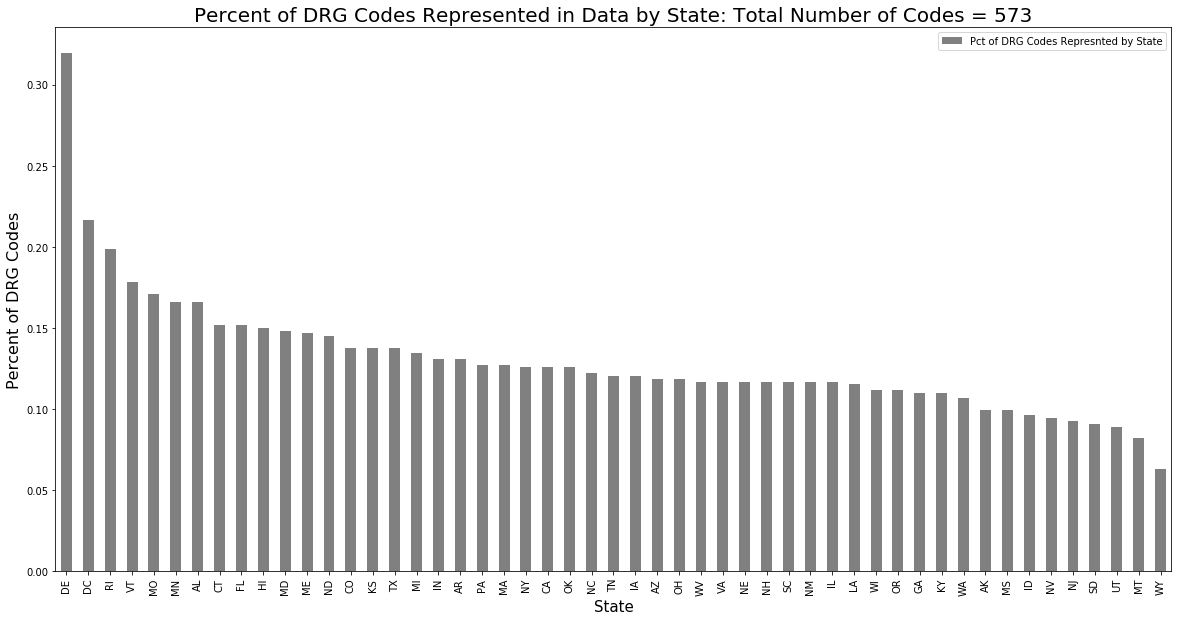

In [102]:
drgstate = ipps.drop_duplicates(subset=['State', 'DRG CODE'], keep=False)
drgstate = drgstate.groupby('State')['DRG CODE'].count().reset_index()
drgstate['Pct of DRG Codes Represnted by State'] = drgstate['DRG CODE']/573
drgstate = drgstate.sort_values('Pct of DRG Codes Represnted by State', ascending = False)
drgstate.set_index('State')

fig, ax = plt.subplots()
drgstate.plot.bar(ax=ax, 
                        figsize=(20,10),
                      x = 'State',
                      y = 'Pct of DRG Codes Represnted by State', 
                      color  = 'grey' )
ax.set_title('Percent of DRG Codes Represented in Data by State: Total Number of Codes = 573', size = 20)
ax.set_xlabel('State', size = 15)
ax.set_ylabel('Percent of DRG Codes', size  = 16)

For each state in the dataset, we see an average of about **15%** of the the total DRG codes represented. Delaware is unique in that nearly **32%** of the total diagnoses are represented in the state. 

# 5. Data Analysis

### a) We begin by looking at the average payment amounts by DRG 

In [103]:
drgpmt = ipps.groupby('DRG Definition')['Average Total Payments','Average Medicare Payments', 'Average Remaining Balance','Percent Medicare Payments','Pct Remaining Balance'].mean()
drgpmt.sort_values('Pct Remaining Balance', ascending=False)

,Average Total Payments,Average Medicare Payments,Average Remaining Balance,Percent Medicare Payments,Pct Remaining Balance
DRG Definition,,,,,
"514 - HAND OR WRIST PROC, EXCEPT MAJOR THUMB OR JOINT PROC W/O CC/MCC",9540.380000,3856.230000,5684.150000,0.404201,0.595799
810 - MAJOR HEMATOL/IMMUN DIAG EXC SICKLE CELL CRISIS & COAGUL W/O CC/MCC,9185.000000,3880.180000,5304.820000,0.422447,0.577553
058 - MULTIPLE SCLEROSIS & CEREBELLAR ATAXIA W MCC,22384.420000,12090.840000,10293.580000,0.540145,0.459855
951 - OTHER FACTORS INFLUENCING HEALTH STATUS,12510.820000,7248.090000,5262.730000,0.579346,0.420654
672 - URETHRAL PROCEDURES W/O CC/MCC,7982.000000,4858.140000,3123.860000,0.608637,0.391363
437 - MALIGNANCY OF HEPATOBILIARY SYSTEM OR PANCREAS W/O CC/MCC,9499.400000,5797.070000,3702.330000,0.610256,0.389744
185 - MAJOR CHEST TRAUMA W/O CC/MCC,6428.220000,3964.819474,2463.400526,0.637022,0.362978
939 - O.R. PROC W DIAGNOSES OF OTHER CONTACT W HEALTH SERVICES W MCC,40399.225000,19911.140000,20488.085000,0.638784,0.361216
497 - LOCAL EXCISION & REMOVAL INT FIX DEVICES EXC HIP & FEMUR W/O CC/MCC,9740.080000,5678.000000,4062.080000,0.660883,0.339117


Since there are over 500 codes, visualizing the whole dataset isn't very useful. Thus, we wanted to start off by looking at the most expensive procedures as measured by 'Average Medicare Payments'. 

In [104]:
ipps_gp = ipps.groupby('DRG Definition')['Average Total Payments', 'Average Medicare Payments','Average Remaining Balance'].mean()
ipps_gp = ipps_gp.sort_values('Average Medicare Payments', ascending=False).drop('Average Total Payments', 1).reset_index()
ipps_exp = ipps_gp.head(10).sort_values('Average Medicare Payments', ascending=False)

We will plot for better visualization.

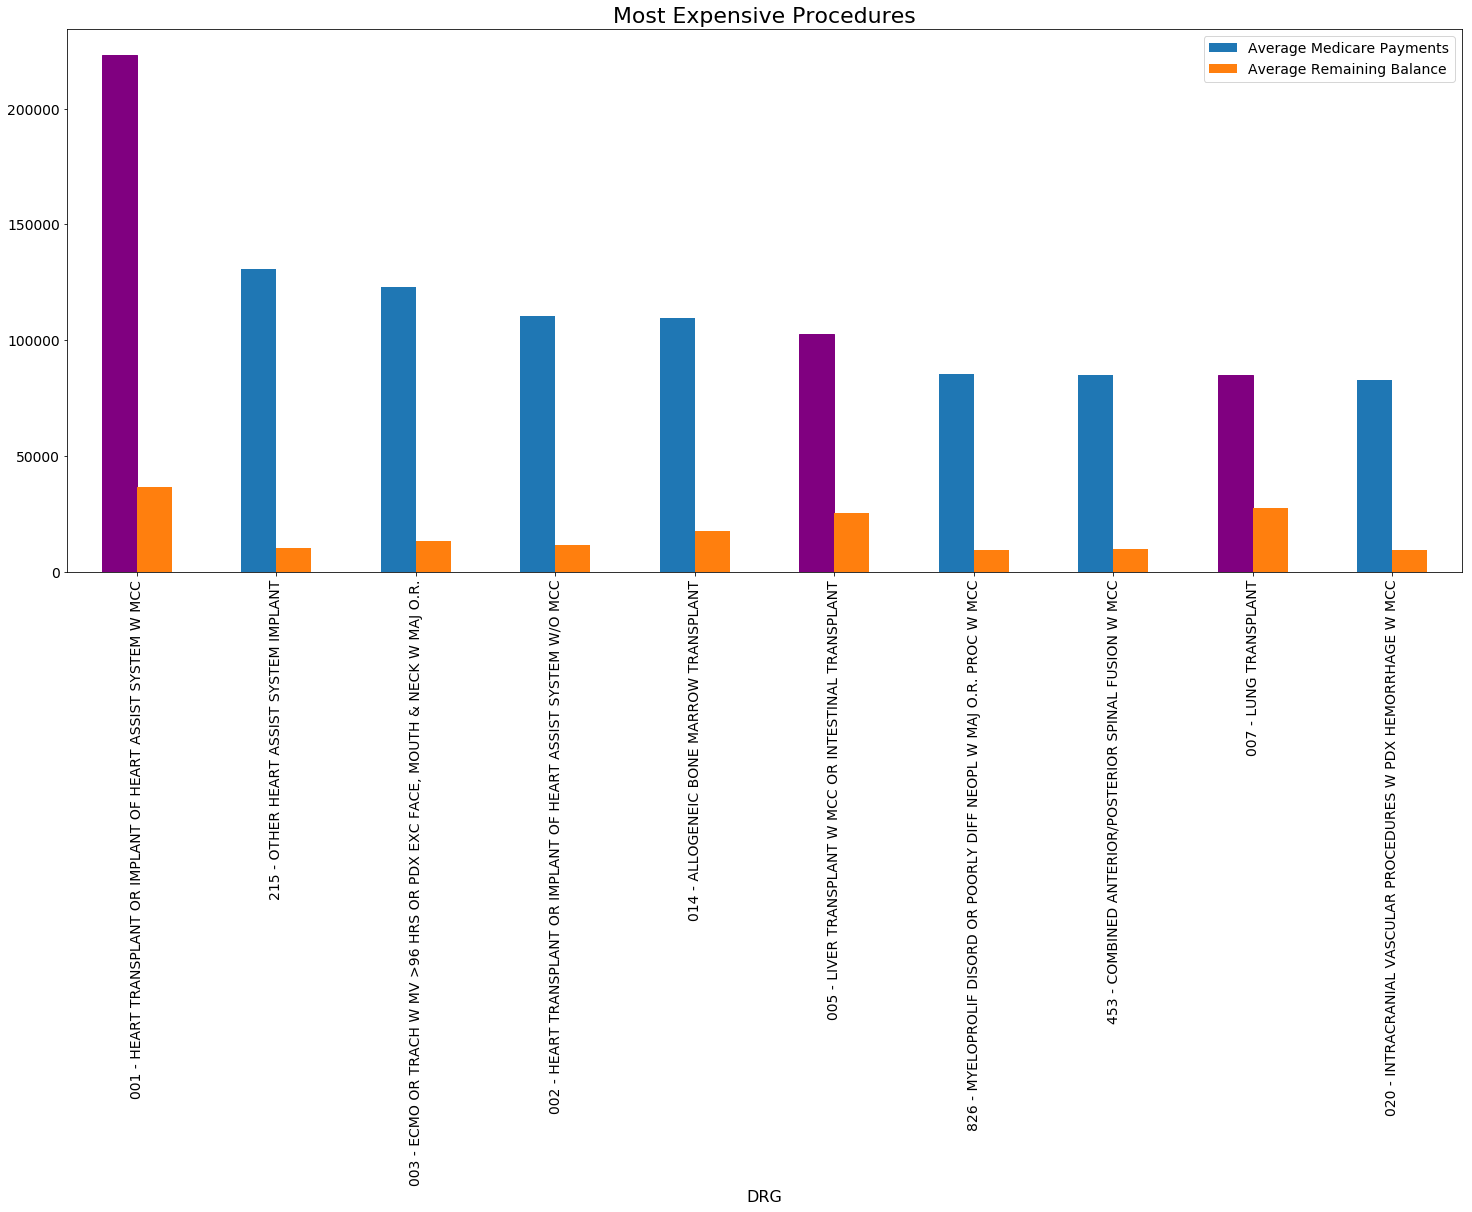

In [105]:
fig, ax = plt.subplots()
ipps_exp.plot.bar(ax=ax, 
                        figsize=(25,10),
                        x = 'DRG Definition'
                          )
#ax.right_ax.set_ylabel('Percent of Total Procedure Not Covered by Medicare (Green)', size = 16)
ax.set_title('Most Expensive Procedures', size = 22)
ax.set_xlabel('DRG', size = 16)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14)
ax.get_children()[0].set_color('purple')
ax.get_children()[5].set_color('purple')
ax.get_children()[8].set_color('purple')

We have highlighted three major transplants in puriple. You can see that a heart transplant with MCC (Major Complication or Comorbidity) is the most expensive procedure. Interestingly, in additon to a heart transplant, the Liver Transpant (005) and  Lung Transplant (007) all leave the patient with some of the largest remaining balances. Some will have secondary insurance to help cover the gap, but many won't. We have two thoughts on this:

1. Transplants are an expensive procedures so there is a limit to what medicare can cover
2. They are the most necessary procedure a person will ever need. One might think they should be fully covered. 

### b) Deep Dive into Heart Tranplants.

DRG 001 "Heart Transplant with MCC" is the most expensive procedure. We decided to dive a little deeper:
1. How does this vary at the state level?
2. Do states that cover a lower percentage of heart transplants also cover less of other procedures. 

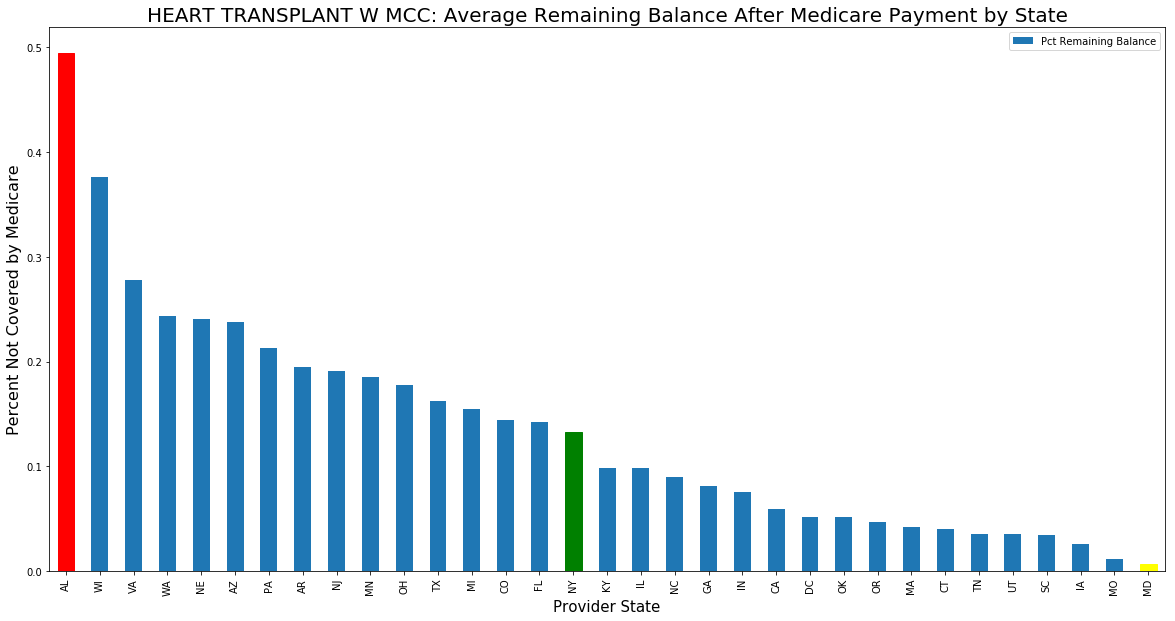

In [106]:
ip_state_gb_001 = ipps.loc[ip_drg['DRG Definition']=='001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC',:]
ip_state_gb_001 = ip_state_gb_001.groupby('State')['Average Total Payments','Average Medicare Payments', 'Average Remaining Balance','Pct Remaining Balance'].mean().reset_index()
ip_state_gb_001 = ip_state_gb_001.drop(['Average Remaining Balance','Average Total Payments','Average Medicare Payments'], axis = 1)
ip_state_gb_001 = ip_state_gb_001.set_index('State')
ip_state_gb_001 = ip_state_gb_001.sort_values('Pct Remaining Balance', ascending=False)

fig, ax = plt.subplots()
ip_state_gb_001.plot.bar(ax=ax, 
                        figsize=(20,10),
                        )
ax.set_title('HEART TRANSPLANT W MCC: Average Remaining Balance After Medicare Payment by State', size = 20)
ax.set_xlabel('Provider State', size = 15)
ax.set_ylabel('Percent Not Covered by Medicare', size  = 16)
ax.get_children()[0].set_color('red')
ax.get_children()[15].set_color('green')
ax.get_children()[32].set_color('yellow')

We have decideded to dive deeper in AL, NY, and MD. They each represent very different reimbursement rates (high, med, low). We want to see if this pattern holds across other procedures within the state. 

## c) Reimbursement rates across all procedures in AL, NY, & MD. Do heart transplants represent broader trends? 

1. We will look at the descriptive statistics for each state
2. We will analyze nationwide averages
3. We will plot a histogram of mean reimbursement rates

### AL

In [107]:
AL = ipps.loc[ip_drg['Provider State']=='AL',:]
AL = AL.groupby(['DRG Definition','DRG CODE'])['Average Total Payments',
                                               'Average Medicare Payments','Average Remaining Balance', 'Pct Remaining Balance'].mean().reset_index()
AL = AL.drop(['DRG CODE','Average Total Payments','Average Medicare Payments'], axis = 1)
AL = AL.sort_values('Pct Remaining Balance', ascending=False)
AL.describe()

,Average Remaining Balance,Pct Remaining Balance
count,365.000000,365.000000
mean,2919.799717,0.190913
std,8086.989364,0.089449
min,532.000000,0.020561
25%,1206.202000,0.123010
50%,1562.742000,0.184413
75%,2535.330000,0.243984
max,146797.310000,0.545414


### NY 

In [108]:
NY = ipps.loc[ip_drg['Provider State']=='NY',:]
NY = NY.groupby(['DRG Definition','DRG CODE'])['Average Total Payments',
                                               'Average Medicare Payments','Average Remaining Balance', 'Pct Remaining Balance'].mean().reset_index()
NY = NY.drop(['DRG CODE','Average Total Payments','Average Medicare Payments'], axis = 1)
NY = NY.sort_values('Pct Remaining Balance', ascending=False)
NY.describe()

,Average Remaining Balance,Pct Remaining Balance
count,458.000000,458.000000
mean,3796.126672,0.174324
std,4172.221497,0.069721
min,493.895000,0.014198
25%,1906.287365,0.130472
50%,2697.120577,0.163561
75%,4169.682759,0.206478
max,56840.305000,0.519889


## MD

In [109]:
MD = ipps.loc[ip_drg['Provider State']=='MD',:]
MD = MD.groupby(['DRG Definition','DRG CODE'])['Average Total Payments',
                                               'Average Medicare Payments','Average Remaining Balance', 'Pct Remaining Balance'].mean().reset_index()
MD = MD.drop(['DRG CODE','Average Total Payments','Average Medicare Payments'], axis = 1)
MD = MD.sort_values('Pct Remaining Balance', ascending=False)
MD.describe()

,Average Remaining Balance,Pct Remaining Balance
count,386.000000,386.000000
mean,1931.260256,0.100801
std,2064.914106,0.055065
min,184.000000,0.005633
25%,1079.617500,0.059387
50%,1298.735114,0.094235
75%,2020.408974,0.135844
max,29933.070000,0.389744


# Country wide

In [110]:
all_ = ipps
all_ = all_.groupby(['DRG Definition','DRG CODE'])['Average Total Payments',
                                               'Average Medicare Payments','Average Remaining Balance', 'Pct Remaining Balance'].mean().reset_index()
all_ = all_.drop(['DRG CODE','Average Total Payments','Average Medicare Payments'], axis = 1)
all_ = all_.sort_values('Pct Remaining Balance', ascending=False)
all_.describe()

,Average Remaining Balance,Pct Remaining Balance
count,573.000000,573.000000
mean,3261.601799,0.180597
std,3246.175466,0.068178
min,184.000000,0.006825
25%,1649.050169,0.135270
50%,2333.485000,0.174105
75%,3689.747600,0.220239
max,36648.048831,0.595799


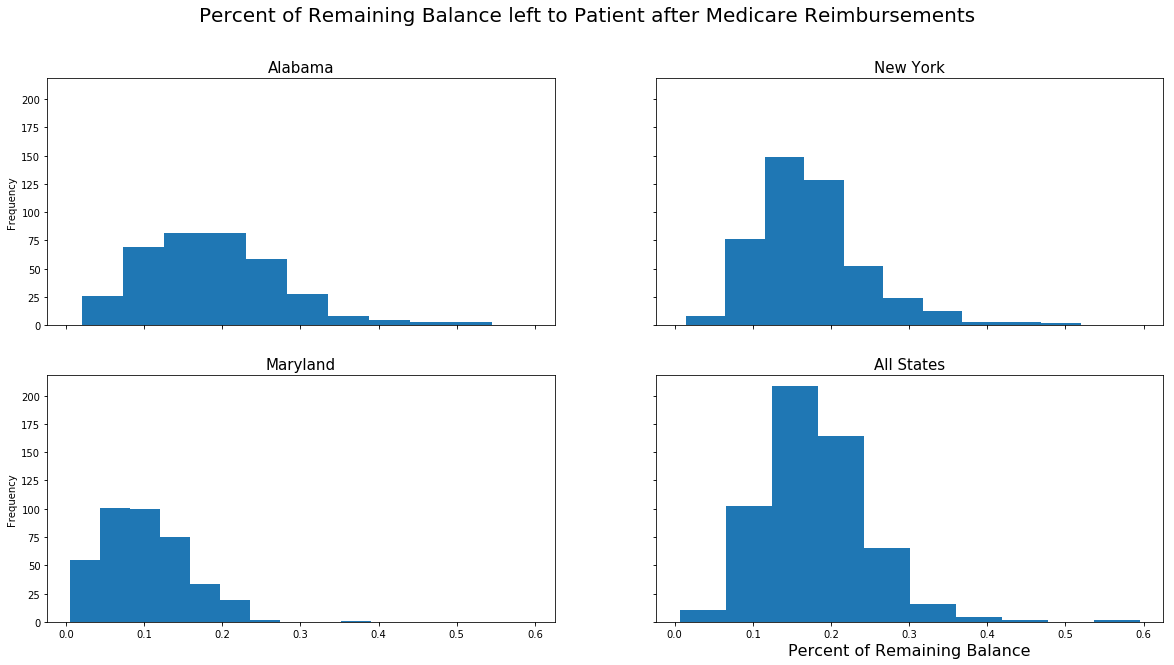

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey = True, figsize = (20,10))

AL['Pct Remaining Balance'].plot.hist(ax=axes[0,0]); axes[0,0].set_title('Alabama', size = 15)
NY['Pct Remaining Balance'].plot.hist(ax=axes[0,1]); axes[0,1].set_title('New York', size = 15)
MD['Pct Remaining Balance'].plot.hist(ax=axes[1,0]); axes[1,0].set_title('Maryland', size = 15)
all_['Pct Remaining Balance'].plot.hist(ax=axes[1,1]); axes[1,1].set_title('All States', size = 15) ; 

fig.suptitle('Percent of Remaining Balance left to Patient after Medicare Reimbursements', fontsize=20)
plt.xlabel('Percent of Remaining Balance', fontsize=16)
ax.xaxis.set_label_coords(-1.05, 1.00)

Looking at these histograms and the descriptive statistics we see an interesting pattern. First, Maryland seems to have the best medicare coverage. This suggests that the heart transplant is indicative of their other proecures. Second, in New York, the mean remaining balance is 17%, which is just below the national average of 18%. This is also inline with thier distribution as it pertains to heart transplants. 

However, in Alabama this pattern doesn't hold in . In Alabama, medicare covered the lowest percentage of the transplant, but overall, medicare coverage is in line with national averages, leaving patients with only 19% of the remaining balance.

## d) We decided to take one more look at Alabama to try and understand if more common procedures as measured by discharges had better reimbusement rates.

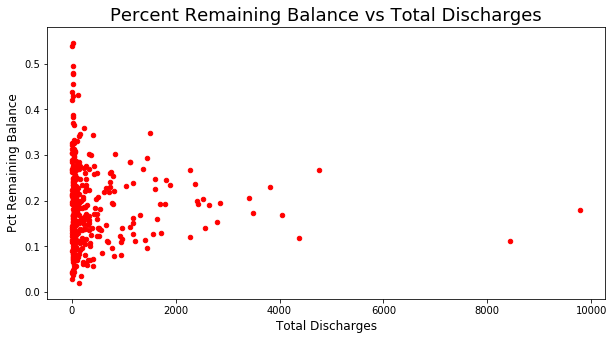

In [113]:
AL001 = ipps.loc[ip_drg['Provider State']=='AL',:]
AL001 = AL001.groupby('DRG Definition').agg({'Average Total Payments':np.mean,
                     'Average Medicare Payments':np.mean,'Average Remaining Balance':np.mean, 'Pct Remaining Balance':np.mean, 'Total Discharges':np.sum})
# Plot Discharges against Remaining Balance 
fig = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.set_ylabel('Pct Remaining Balance',fontsize=12)
ax.set_xlabel('Total Discharges',fontsize=12)
ax.set_title('Percent Remaining Balance vs Total Discharges', fontsize=18)
AL001.plot.scatter(x = 'Total Discharges',y='Pct Remaining Balance' ,ax=ax, c= 'red' )
#,s=size

Our hypothesis was that if you performed a procedure more often, you were able to get costs down and were more adpet at the procedure, resulting in fewer complications. However, there were **13** patients discharged from "001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC", and they were on the hook for **49%** of the procedure, whereas there were and, **1,498** Patients discharged with "310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W/O CC/MCC" and they were still on the hook for **34%** of the procedure. 

It's possible that AL doesn't cover major medical procedures as fully as preventitive care. We would need more data to answer that question, but it would be an interesting next step.

## e) Next we wanted to see if state level income impacted the amount Medicare will cover for heart transplants.

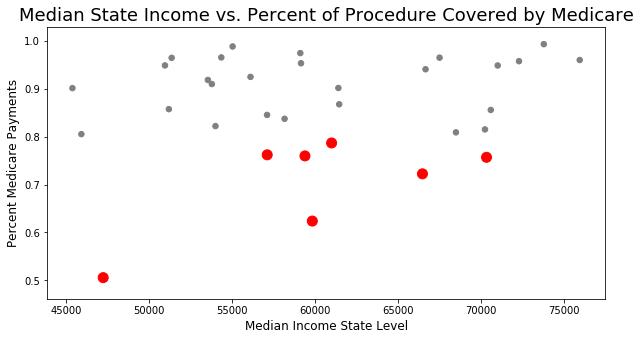

In [114]:
drg001 = ipps.loc[ip_drg['DRG Definition']=='001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC',:]
drg001 = drg001.groupby('State')['Median Income State Level','Percent Medicare Payments'].mean()
drg001 = drg001.sort_values('Percent Medicare Payments', ascending = True).reset_index()

# Plot median income by percent covered by medicare
fig = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.set_ylabel('Average Score',fontsize=12)
ax.set_xlabel('Number of Discharges in State',fontsize=12)
ax.set_title('Median State Income vs. Percent of Procedure Covered by Medicare', fontsize=18)
colors = []
size = []
drg001 = drg001.sort_values('Percent Medicare Payments',ascending=True)
for i in drg001['Percent Medicare Payments']:
    if i <= .8:
        colors.append('red')
        size.append(100)
    elif i>.8:
        colors.append('grey')
        size.append(30)
drg001.plot.scatter(x='Median Income State Level',y='Percent Medicare Payments',ax=ax,color=colors,s=size)

There are a few takeaways from the scatter plot. 
1. On average medicare covers at least 80% of a heart transplant. 
2. Medicare in Alabama (bottom left) pays only around 50% of the transplant, and the state has one of the lowest median household incomes. 
3. Broadly, there doesn't seem to be a correlation between income and coverage. This would suggest that the rules governing medicare payments should likely be reevaluated. If a patient needs a heart transplant in Alabama, which will cost at a minimum 100k, and they are liable for almost 50k. It would seem this will likely put the patient in debt should they survive the procedure.

## f) We looked at the correlation between Average Medicare Payments and the Percent of the State Population enrolled in Medicare 

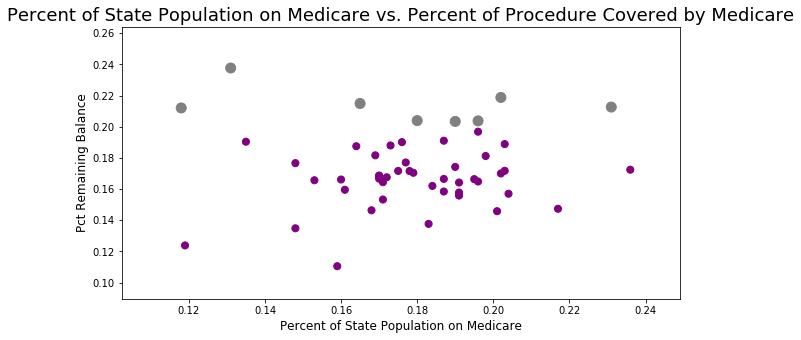

In [115]:
state_level = ipps.groupby(['State'])['Total Discharges','Average Covered Charges',
                     'Average Total Payments', 'Average Medicare Payments','Total Medicare Enrollment State Level',
                    'Percent of State Population on Medicare','Total Enrollment Metropolitan Residence per State',
                     'State Population','Median Income State Level', 
                    'Average Remaining Balance', 'Pct Remaining Balance' ,'Percent Medicare Payments'].mean()
state_level
# Plot median income by percent covered by medicare
fig = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.set_ylabel('Average Score',fontsize=12)
ax.set_xlabel('Number of Discharges in State',fontsize=12)
ax.set_title('Percent of State Population on Medicare vs. Percent of Procedure Covered by Medicare', fontsize=18)
colors = []
size = []
state_level = state_level.sort_values('Pct Remaining Balance',ascending=True)
for i in state_level['Pct Remaining Balance']:
    if i<=.2:
        colors.append('purple')
        size.append(50)
    else:
        colors.append('grey')
        size.append(100)
state_level.plot.scatter(x='Percent of State Population on Medicare',y='Pct Remaining Balance',ax=ax,color=colors,s=size)

We expected to see a correlation between the percent of the state population on medicare and the average medicare payout. For example, states with a higher percent of Medicare enrollees might have higher lower payouts since there are more people to cover. However, we see a lot of consistency. Most states only leave patients with an average balance of 20% regardless of the number of enrollees in the state.

# g) Regression data

Our last step of the analysis is to try and understand what are the true drivers of medicare coverage ($). Our independent variable is "average_remaining_balance". We want to understand what drives the average amount medicare covers per procedure. 

**Hypothesis:** Given that medicare coverage is set at the state level, we expect state demographics to be some of the biggest cost drivers. 

In [116]:
# simplify variable names for regressions 
ipps_reg = ipps
ipps_reg.columns = ipps.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
list(ipps_reg.columns.values)

['drg_definition',
 'provider_id',
 'provider_name',
 'provider_street_address',
 'provider_city',
 'provder_state',
 'provider_zip_code',
 'hospital_referral_region_hrr_description',
 'total_discharges',
 'average_covered_charges',
 'average_total_payments',
 'average_medicare_payments',
 'state',
 'score',
 'total_medicare_enrollment_state_level',
 'percent_of_state_population_on_medicare',
 'total_enrollment_metropolitan_residence_per_state',
 'state_population',
 'median_income_state_level',
 'average_remaining_balance',
 'pct_remaining_balance',
 'percent_medicare_payments',
 'drg_code']

### Regression 1: We regress just medicare enrollment, discharges, income, and state population on average medicare payments 
Y = average_remaining_balance

X =  
total_discharges score <br> 
percent_of_state_population_on_medicare <br> 
median_income_state_level
state_population'

In [117]:
reg = smf.ols('average_remaining_balance  ~ total_discharges + score + percent_of_state_population_on_medicare + median_income_state_level + state_population',data=ipps_reg).fit()      
print(reg.summary())

                                OLS Regression Results                               
Dep. Variable:     average_remaining_balance   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     166.5
Date:                       Tue, 07 May 2019   Prob (F-statistic):          2.68e-177
Time:                               10:04:55   Log-Likelihood:            -1.8112e+06
No. Observations:                     192675   AIC:                         3.622e+06
Df Residuals:                         192669   BIC:                         3.623e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Regression 2: We introduced state fixed effects

Y = average_remaining_balance

X =  
total_discharges score <br> 
percent_of_state_population_on_medicare <br> 
median_income_state_level <br>
state_population' <br>
state

In [118]:
reg = smf.ols('average_remaining_balance  ~ total_discharges + score + percent_of_state_population_on_medicare + median_income_state_level + state_population + state'
              ,data=ipps_reg).fit()
print(reg.summary())

                                OLS Regression Results                               
Dep. Variable:     average_remaining_balance   R-squared:                       0.017
Model:                                   OLS   Adj. R-squared:                  0.017
Method:                        Least Squares   F-statistic:                     67.16
Date:                       Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                               10:05:16   Log-Likelihood:            -1.8100e+06
No. Observations:                     192675   AIC:                         3.620e+06
Df Residuals:                         192624   BIC:                         3.621e+06
Df Model:                                 50                                         
Covariance Type:                   nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Regression 3: We introduced DRG fixed effects
Y = average_remaining_balance

X =  
total_discharges score <br> 
percent_of_state_population_on_medicare <br> 
median_income_state_level <br>
state_population' <br>
drg_description

In [119]:
reg = smf.ols('average_remaining_balance ~ total_discharges + score + percent_of_state_population_on_medicare + median_income_state_level + state_population + drg_definition'
              ,data=ipps_reg).fit()
print(reg.summary())

                                OLS Regression Results                               
Dep. Variable:     average_remaining_balance   R-squared:                       0.276
Model:                                   OLS   Adj. R-squared:                  0.274
Method:                        Least Squares   F-statistic:                     127.8
Date:                       Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                               10:06:29   Log-Likelihood:            -1.7805e+06
No. Observations:                     192675   AIC:                         3.562e+06
Df Residuals:                         192101   BIC:                         3.568e+06
Df Model:                                573                                         
Covariance Type:                   nonrobust                                         
                                                                                                   coef    std err          t      P>|t|    

### Regression 4: We introduced DRG  and State fixed effects
Y = average_remaining_balance

X =  
total_discharges score <br> 
percent_of_state_population_on_medicare <br> 
median_income_state_level <br>
state_population' <br>
drg_description <br>
state

In [120]:
reg = smf.ols('average_remaining_balance  ~ total_discharges + score + percent_of_state_population_on_medicare + median_income_state_level + state_population + drg_definition + state'
              ,data=ipps_reg).fit()
print(reg.summary())

                                OLS Regression Results                               
Dep. Variable:     average_remaining_balance   R-squared:                       0.289
Model:                                   OLS   Adj. R-squared:                  0.286
Method:                        Least Squares   F-statistic:                     126.0
Date:                       Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                               10:07:49   Log-Likelihood:            -1.7788e+06
No. Observations:                     192675   AIC:                         3.559e+06
Df Residuals:                         192056   BIC:                         3.565e+06
Df Model:                                618                                         
Covariance Type:                   nonrobust                                         
                                                                                                   coef    std err          t      P>|t|    

## Regression Analysis:

Based on our findings when controlling for state and diagnosis, in addition to our other variables, our model still only captures **~28%** of the variation in what patients are left to cover after Medicare. Consequently, we are likely missing some key variables. If we were to further analyze Medicare Payments, we dive deeper into two areas **1)** Patient outcomes and health measures of the population, i.e obesity and smoking rates, **2)** Policy decisions over time. Medicare is set at the state level. We might be able to find clearer patterns by analyzing the data over time. 

Lastly, we did find one particularly interesting finding. In regressions 1-3 the variable "percent_of_state_population_on_medicare" has a large **negative** and statistically significant coefficient. However, in regression 4, when we control for both state and DRG fixed effects, the sign flips. There is now a large **positive** and statistically significant coefficient. Our hypothesis is that politicians might be more likely to advocate for better coverage since it impacts a larger percent of the population.

# Conclusion



Using publicly-available healthcare data we were able to establish some key trends:
<br>&nbsp;&nbsp;&nbsp;1) Costs vary significantly per provider and state, which demonstrates an opportunity for a deep-dive into best practices to manage rising healthcare costs.
<br>&nbsp;&nbsp;&nbsp;2) Excessive Readmission Ratio (ERR) is not correlated with how much providers charge for treatments.
<br>&nbsp;&nbsp;&nbsp;3) Reimbursement rates are inconsistent across state lines, particularly for intensive and life-saving procedures.

We had a narrow view of medical data, but our initial findings leave us with two key takeaways. First, in order to make more robust conclusions, we need to analyze the data over time, at the county level, and introduce more variables that affect health outcomes. Second, one way Medicare is currently looking to manage costs is through evidence-based practices for both patient management and business outcomes. These analyses can be taken as a step towards achieving this goal.
